# LOAN DEFAULTERS CLASSIFICATION

## Dataset Description:

| Column Name            | Description                                                                                       |
|------------------------|---------------------------------------------------------------------------------------------------|
| earliest_cr_line       | The month the borrower's earliest reported credit line was opened                                 |
| emp_title              | The job title supplied by the Borrower when applying for the loan.                                 |
| fico_range_high        | The upper boundary range the borrower’s FICO at loan origination belongs to.                        |
| fico_range_low         | The lower boundary range the borrower’s FICO at loan origination belongs to.                        |
| Grade                  | LC assigned loan grade                                                                            |
| application_type       | Indicates whether the loan is an individual application or a joint application with two co-borrowers |
| initial_list_status    | The initial listing status of the loan. Possible values are – W, F                                 |
| num_actv_bc_tl        | Number of currently active bankcard accounts.                                                      |
| mort_acc               | Number of mortgage accounts.                                                                      |
| tot_cur_bal            | Total current balance of all accounts                                                             |
| open_acc               | The number of open credit lines in the borrower's credit file.                                      |
| pub_rec                | Number of derogatory public records                                                               |
| pub_rec_bankruptcies  | Number of public record bankruptcies.                                                              |
| Purpose                | A category provided by the borrower for the loan request.                                          |
| revol_bal              | Total credit revolving balance                                                                    |
| Title                  | The loan title provided by the borrower                                                           |
| total_acc              | The total number of credit lines currently in the borrower's credit file                           |
| verification_status    | Indicates if income was verified by LC, not verified, or if the income source was verified         |
| addr_state             | The state provided by the borrower in the loan application                                         |
| annual_inc             | The self-reported annual income provided by the borrower during registration.                      |
| emp_length             | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| home_ownership         | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. |
| int_rate               | Interest Rate on the loan                                                                         |
| loan_amnt              | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| sub_grade              | LC assigned loan subgrade                                                                         |
| Term                   | The number of payments on the loan. Values are in months and can be either 36 or 60.               |
| revol_util             | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| Target                 | loan_status Status of the loan                                                                    |



<a id="table_content"></a>

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Summary Statistics of Numeric Features](#3.1)**
   - **[3.2: Summary Statistics of Categorical Features](#3.2)**
- **[4: EDA](#4)**
   - **[4.1:Univariate Analysis](#4.1)**
       - **[4.1.1 Numerical Features Univariate Analysis](#4.1.1)**
       - **[4.1.2 Categorical Features Univariate Analysis](#4.1.2)**
           - **[4.1.2.1: Low Cardinality Categorical Features](#4.1.2.1)**
           - **[4.1.2.2: High Cardinality Categorical Features](#4.1.2.1)**
   - **[4.2: Bivariate Analysis](#4.2)**
       - **[4.2.1: Numerical Features vs Target (loan_status)](#4.2.1)**
       - **[4.2.2: Categorical Features vs Target (loan_status)](#4.2.2)**
           - **[4.2.2.1: Low Cardinality Categorical Features vs Target (loan_status)](#4.2.2.1)**
           - **[4.2.2.2: High Cardinality Categorical Features vs Target (loan_status)](#4.2.2.2)**           
- **[5: Data Preprocessing](#5)**
    - **[5.1: Feature Selection and Engineering](#5.1)**
       - **[5.1.1: High Cardinal Categorical Features](#5.1.1)**
       - **[5.1.2: Low Cardinal Categorical Features](#5.1.2)**
   - **[5.2: Handle Missing Values](#5.2)**
   - **[5.3: Outlier Treatment](#5.3)**
   - **[5.4: Duplicated Data](#5.4)**
   - **[5.5: Encode Categorical Variables](#5.5)**
   - **[5.6: Check unbalance](#5.5)**
       - **[5.6.1: Handling unbalance](#5.6.1)**
- **[6:Busimess Requirement](#6)**
- **[7: Spliting Training Dataset](#7)**
- **[8: Decision Tree Mode Building](#8)**
   - **[8.1: DT Base Model Definition](#8.1)**
   - **[8.2: DT Hyperparameter Tuning](#8.2)**
   - **[8.3: DT Model Evaluation](#8.3)**
   - **[8.4: Target Prediction for Test Data](#8.4)**
- **[9: Random Forest Mode Building](#9)**
   - **[9.1: RF Base Model Definition](#9.1)**
   - **[9.2: RF Hyperparameter Tuning](#9.2)**
   - **[9.3: RF Model Evaluation](#9.3)**
   - **[9.4: Target Prediction for Test Data](#9.4)**
- **[10: XGBoost Mode Building](#10)**
   - **[10.1: XGBoost Base Model Definition](#10.1)**
   - **[10.2: Outlier treatment using Box-cox](#10.2)**
   - **[10.3: XGBoost Hyperparameter Tuning](#10.3)**
   - **[10.4: XGBoost Model Evaluation](#10.4)**
   - **[10.5: Target Prediction for Test Data](#10.5)**
- **[11:Conclusion](#11)**  

 
 
   

# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">1: Import Libraries</p>
 ⬆️[Table Contents](#table_content)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

import xgboost as xgb
%matplotlib inline

# <p id="2" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">2: Read Dataset</p>
 ⬆️[Table Contents](#table_content)

In [2]:
# Load training and testing datasets
train_df = pd.read_csv("train_loan_data (1).csv")
test_df = pd.read_csv("test_loan_data (1).csv")

In [3]:
train_df.shape

(80000, 28)

In [4]:
test_df.shape

(20000, 27)

In [5]:
pd.set_option('display.max_columns',29)

In [6]:
df = train_df.copy()
df.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type initial_list_status  int_rate  loan_amnt  \
0       MORTGAGE       Individual                   w     18.99      18075   
1           RENT       Individual                   w     10.16       8800   
2       MORTGAGE       Individual                   w     11.47      18000   
3       MORTGAGE       Individual                   w      9.16      20000   
4           RENT       Individual                   f     23.83      35000   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       1.0     319479.0         7        0   
1             4.0       0.0      19944.0         5        0   
2             4.0       2.0      23199.0         7        0   
3             4.0       1.0      72651.0        12        0   
4            14.0       7.0      64631.0        23        0   

   pub_rec_bankruptcies             purpose  revol_bal  revol_util sub_grade  \
0                   0.0  debt_consolidation       5338        93.6        E1   
1                   0.0  debt_consolidation      19944        60.3        B1   
2                   0.0  debt_consolidation      23199        88.5        B5   
3                   0.0  debt_consolidation      18425        69.0        B2   
4                   0.0  debt_consolidation      34370        90.0        F5   

         term                title  total_acc verification_status loan_status  
0   60 months   Debt consolidation          8     Source Verified   Defaulted  
1   36 months          Credit Loan         12            Verified        Paid  
2   36 months   Debt consolidation         16     Source Verified        Paid  
3   36 months   Debt consolidation         19     Source Verified        Paid  
4   60 months  Debt Connsolidation         59            Verified        Paid

In [7]:
df.shape

(80000, 28)

# <p id="3" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">3: Dataset Overview</p>
 ⬆️[Table Contents](#table_content)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li>The dataset contains <b>80000</b> entries.</li>
    <li>Each entry represents a loan application.</li>
    <li>There are <b>28</b> columns in the dataset.</li>
    <li>The columns represent various features such as:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>State of the borrower's address (addr_state)</li>
        <li>Annual income (annual_inc)</li>
        <li>Earliest reported credit line (earliest_cr_line)</li>
        <li>Employment length (emp_length)</li>
        <li>Job title (emp_title)</li>
        <li>FICO score range (fico_range_high, fico_range_low)</li>
        <li>Loan grade (grade)</li>
        <li>Home ownership status (home_ownership)</li>
        <li>Application type (application_type)</li>
        <li>Initial listing status (initial_list_status)</li>
        <li>Interest rate (int_rate)</li>
        <li>Loan amount (loan_amnt)</li>
        <li>Number of active bankcard accounts (num_actv_bc_tl)</li>
        <li>Number of mortgage accounts (mort_acc)</li>
        <li>Total current balance of all accounts (tot_cur_bal)</li>
        <li>Number of open credit lines (open_acc)</li>
        <li>Number of derogatory public records (pub_rec)</li>
        <li>Number of public record bankruptcies (pub_rec_bankruptcies)</li>
        <li>Loan purpose (purpose)</li>
        <li>Total credit revolving balance (revol_bal)</li>
        <li>Revolving line utilization rate (revol_util)</li>
        <li>Loan subgrade (sub_grade)</li>
        <li>Term of the loan (term)</li>
        <li>Loan title (title)</li>
        <li>Total number of credit lines (total_acc)</li>
        <li>Income verification status (verification_status)</li>
        <li>Loan status (loan_status)</li>
        <li>Loan type (type)</li>
    </ul>
        <li>There are missing values in several columns such as:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>Employment length (emp_length)</li>
        <li>Job title (emp_title)</li>
        <li>Number of active bankcard accounts (num_actv_bc_tl)</li>
        <li>Number of mortgage accounts (mort_acc)</li>
        <li>Total current balance of all accounts (tot_cur_bal)</li>
        <li>Number of public record bankruptcies (pub_rec_bankruptcies)</li>
        <li>Revolving line utilization rate (revol_util)</li>
        <li>Loan title (title)</li>
        <li>Loan status (loan_status)</li>
    </ul>
    <li>The target variable is '<b>loan_status</b>', which represents the status of the loan application.</li>
    <li>The features include a mix of numerical (float64) and categorical (object) data types.</li>
    <li>The dataset requires handling missing values before proceeding with analysis or modeling.</li>
    <li>Further analysis could involve exploring relationships between different features and the loan status, as well as building predictive models to classify loan applications based on their status.</li>
</ul>
    
</div>


<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Note 📝:</h3>
    Based on the data types and the feature explanations provided earlier, we identified that 3 columns (<b>pub_rec</b>,<b>mort_acc</b>, <b>pub_rec_bankruptcies</b>) are categorical in terms of their semantics. These features must have string (object) data type to ensure proper analysis and interpretation in subsequent steps:
</div>

In [9]:
categorical_columns_semantics = ['fico_range_high','fico_range_low','num_actv_bc_tl','open_acc','pub_rec','mort_acc', 'pub_rec_bankruptcies','total_acc']


# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in df.columns:
        df[column] = df[column].astype(str)
        train_df[column] = train_df[column].astype(str)
        test_df[column] = test_df[column].astype(str)

# Verify the changes in data types
df.dtypes

addr_state               object
annual_inc              float64
earliest_cr_line         object
emp_length               object
emp_title                object
fico_range_high          object
fico_range_low           object
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl           object
mort_acc                 object
tot_cur_bal             float64
open_acc                 object
pub_rec                  object
pub_rec_bankruptcies     object
purpose                  object
revol_bal                 int64
revol_util              float64
sub_grade                object
term                     object
title                    object
total_acc                object
verification_status      object
loan_status              object
dtype: object

## 3.1: Summary Statistics for Numerical Features

 ⬆️[Table Contents](#table_content)

In [10]:
df.describe().T

count           mean            std     min       25%  \
annual_inc   80000.0   76046.143138   69020.055377    0.00  46000.00   
int_rate     80000.0      13.232898       4.771705    5.31      9.75   
loan_amnt    80000.0   14403.867813    8703.826298  750.00   7925.00   
tot_cur_bal  76052.0  141586.358991  159371.366632    0.00  29642.00   
revol_bal    80000.0   16289.340975   22649.147472    0.00   5965.75   
revol_util   79947.0      51.899142      24.504836    0.00     33.50   

                  50%        75%         max  
annual_inc   65000.00   90000.00  7141778.00  
int_rate        12.74      15.99       30.99  
loan_amnt    12000.00   20000.00    40000.00  
tot_cur_bal  81000.50  211027.25  5172185.00  
revol_bal    11111.00   19635.00  1023940.00  
revol_util      52.20      70.80      152.60

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Annual Income:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average annual income of loan applicants is approximately <b>\$76,046</b>, with a considerable standard deviation of <b>\$69020</b>. This indicates a wide range of income levels among applicants.</li>
                <li>The minimum reported income is <b>\$0</b>, which might be an anomaly or could represent unemployed individuals or students or those with no reported income.</li>
                <li>The maximum reported income is significantly high at <b>\$7,141,778</b>, which could represent outliers or high-income individuals.</li>
            </ul>
        </li>
        <li><b>Interest Rate:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average interest rate on loans is approximately <b>13.23%</b>, with a standard deviation of <b>4.77%</b>. This signifies the range of interest rates offered to borrowers.</li>
                <li>Interest rates range from <b>5.31%</b> to <b>30.99%</b>, with most falling between <b>9.75%</b> and <b>15.99%</b>. This indicates variability in loan pricing based on factors like creditworthiness and market conditions.</li>
            </ul>
        </li>
        <li><b>Loan Amount:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average loan amount requested is <b>\$14,404</b>, with a standard deviation of <b>\$8,704</b>. This suggests variability in loan sizes among applicants.</li>
                <li>Loan amounts range from <b>\$750</b> to <b>\$40,000</b>, with the majority between <b>\$7,925</b> and <b>\$20,000</b>.</li>
            </ul>
        </li>
        <li><b>Other Numerical Features:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Features like'<b>revol_bal</b>', and '<b>revol_util</b>',  also exhibit variability in their distributions, indicating diversity among applicants in terms of their credit and financial profiles.</li>
            </ul>
        </li>
    </ul>
</div>


## 3.2: Summary Statistics for Categorical Features
 ⬆️[Table Contents](#table_content)

In [11]:
df.describe(include="object")

addr_state earliest_cr_line emp_length emp_title fico_range_high  \
count       80000            80000      75412     74982           80000   
unique         51              640         11     36661              38   
top            CA           Sep-03  10+ years   Teacher             664   
freq        11744              547      26278      1278            7267   

       fico_range_low  grade home_ownership application_type  \
count           80000  80000          80000            80000   
unique             38      7              6                2   
top               660      B       MORTGAGE       Individual   
freq             7267  23502          39628            78446   

       initial_list_status num_actv_bc_tl mort_acc open_acc pub_rec  \
count                80000          80000    80000    80000   80000   
unique                   2             29       29       56      15   
top                      w            3.0      0.0        9       0   
freq                 46745          16176    31079     7202   66369   

       pub_rec_bankruptcies             purpose sub_grade        term  \
count                 80000               80000     80000       80000   
unique                    9                  14        35           2   
top                     0.0  debt_consolidation        C1   36 months   
freq                  69862               46418      4982       60750   

                     title total_acc verification_status loan_status  
count                79030     80000               80000       80000  
unique                5348       107                   3           2  
top     Debt consolidation        19     Source Verified        Paid  
freq                 39396      2893               30855       64030

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Address State:</b> There are <b>51</b> unique states represented in the dataset, with <b>CA</b> being the most frequent state, occurring <b>11744</b> times. This indicates that a significant number of loan applicants are from California.</li>
        <li><b>Earliest Credit Line:</b> The feature represents the month and year when the borrower's earliest reported credit line was opened. It has <b>640</b> unique values, with the most common being <b>Sep-03</b>, occurring <b>547</b> times.</li>
        <li><b>Employment Length:</b> This feature indicates the length of employment in years. The most frequent value is <b>10+ years</b>, occurring <b>26278</b> times, suggesting that many applicants have long-term employment.</li>
        <li><b>Employment Title:</b> There are <b>36661</b> unique employment titles, with <b>Teacher</b> being the most common, occurring <b>1278</b> times. This indicates a wide variety of job titles among loan applicants.</li>
        <li><b>FICO Score Range:</b> The FICO score range reported by applicants ranges from <b>660</b> to <b>850</b>, with the average high score being <b>664</b> and the average low score being <b>660</b>.</li>
        <li><b>Loan Grade:</b> The loan grade assigned by the lending institution ranges from <b>A</b> to <b>G</b>, with <b>B</b> being the most common grade, occurring <b>23502</b> times.</li>
        <li><b>Home Ownership:</b> There are <b>6</b> unique categories representing home ownership status, with <b>MORTGAGE</b> being the most common, occurring <b>39628</b> times.</li>
        <li><b>Application Type:</b> Indicates whether the loan application is individual or joint. The majority of applications are <b>Individual</b>, occurring <b>78446</b> times.</li>
        <li><b>Initial List Status:</b> Represents the initial listing status of the loan. The majority of loans have an initial list status of <b>W</b>, occurring <b>46745</b> times.</li>
        <li><b>Number of Active Bankcard Accounts:</b> There are  <b>29</b> active bankcard accounts reported by applicants, with most having <b>3</b> active accounts.</li>
        <li><b>Number of Mortgage Accounts:</b> There are <b>29</b> Mortgage Accounts accounts reported by applicants, with most having <b>0</b> mortgage  accounts.</li>
        <li><b>Number of Open Credit Lines:</b> There are <b>56</b> open credit lines reported by applicants, with most having <b>9</b> open credit lines.</li>
        <li><b>Number of Public Record Items:</b> There are <b>15</b> public record items reported by applicants, with most having <b>0</b> public record items.</li>
        <li><b>Number of Public Record Bankruptcies:</b> There are <b>9</b> Public Record Bankruptcies reported by applicants, with most having <b>0</b> Bankruptcies.</li>
        <li><b>Purpose:</b> Describes the purpose of the loan request. The most common purpose is <b>Debt consolidation</b>, occurring <b>46418</b> times.</li>
        <li><b>Loan Sub Grade:</b> Represents a sub-category within the loan grade, ranging from <b>A1</b> to <b>G5</b>. The most common sub-grade is <b>C1</b>, occurring <b>4982</b> times.</li>
        <li><b>Term:</b> Indicates the number of payments on the loan, either <b>36 months</b> or <b>60 months</b>. The majority of loans have a term of <b>36 months</b>, occurring <b>60750</b> times.</li>
        <li><b>Title:</b> The loan title provided by the borrower. There are <b>5348</b> unique titles, with <b>Debt consolidation</b> being the most common, occurring <b>39396</b> times.</li>
        <li><b>Total Number of Credit Lines:</b> The average total number of credit lines reported by applicants is <b>22</b>, with a maximum of <b>107</b> credit lines.</li>
        <li><b>Verification Status:</b> Indicates whether income was verified by the lending institution. The most common verification status is <b>Source Verified</b>, occurring <b>30855</b> times.</li>
        <li><b>Loan Status:</b> Represents the status of the loan. It appears that <b>paid</b> is the most common status, occurring <b>64030</b> times.which will lead to unbalance of data</li>
    </ul>
</div>


# <p id="4" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">4: EDA</p>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Note 📝:</h3>
    <p>It is better to perform Exploratory Data Analysis (EDA) before handling missing values. Doing EDA after handling missing values have a higher likelihood of using techniques based on false assumptions, which will hamper data quality. Poorer data quality will naturally have a negative influence on any machine learning model built in the subsequent modeling phase (garbage in, garbage out).</p>
    <p><b>Using EDA for Missing Data:</b></p>
    <ul>
        <li>EDA is an effective way to grasp the key characteristics of the dataset and its missing values.</li>
        <li>By arming yourself with more information on the missing data, you will be able to make more informed decisions with regard to how these missing values should be dealt with.</li>
    </ul>
</div>


In [12]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')


## 4.1: Univariate Analysis
<a id="4.1"></a>
 ⬆️[Table Contents](#table_content)

### 4.1.1 Numerical Features Univariate Analysis
<a id="4.1.1"></a>
 ⬆️[Table Contents](#table_content)

In [13]:
continuous_features = df.describe().columns

In [14]:
continuous_features

Index(['annual_inc', 'int_rate', 'loan_amnt', 'tot_cur_bal', 'revol_bal',
       'revol_util'],
      dtype='object')

In [15]:
df_continuous = df[continuous_features]

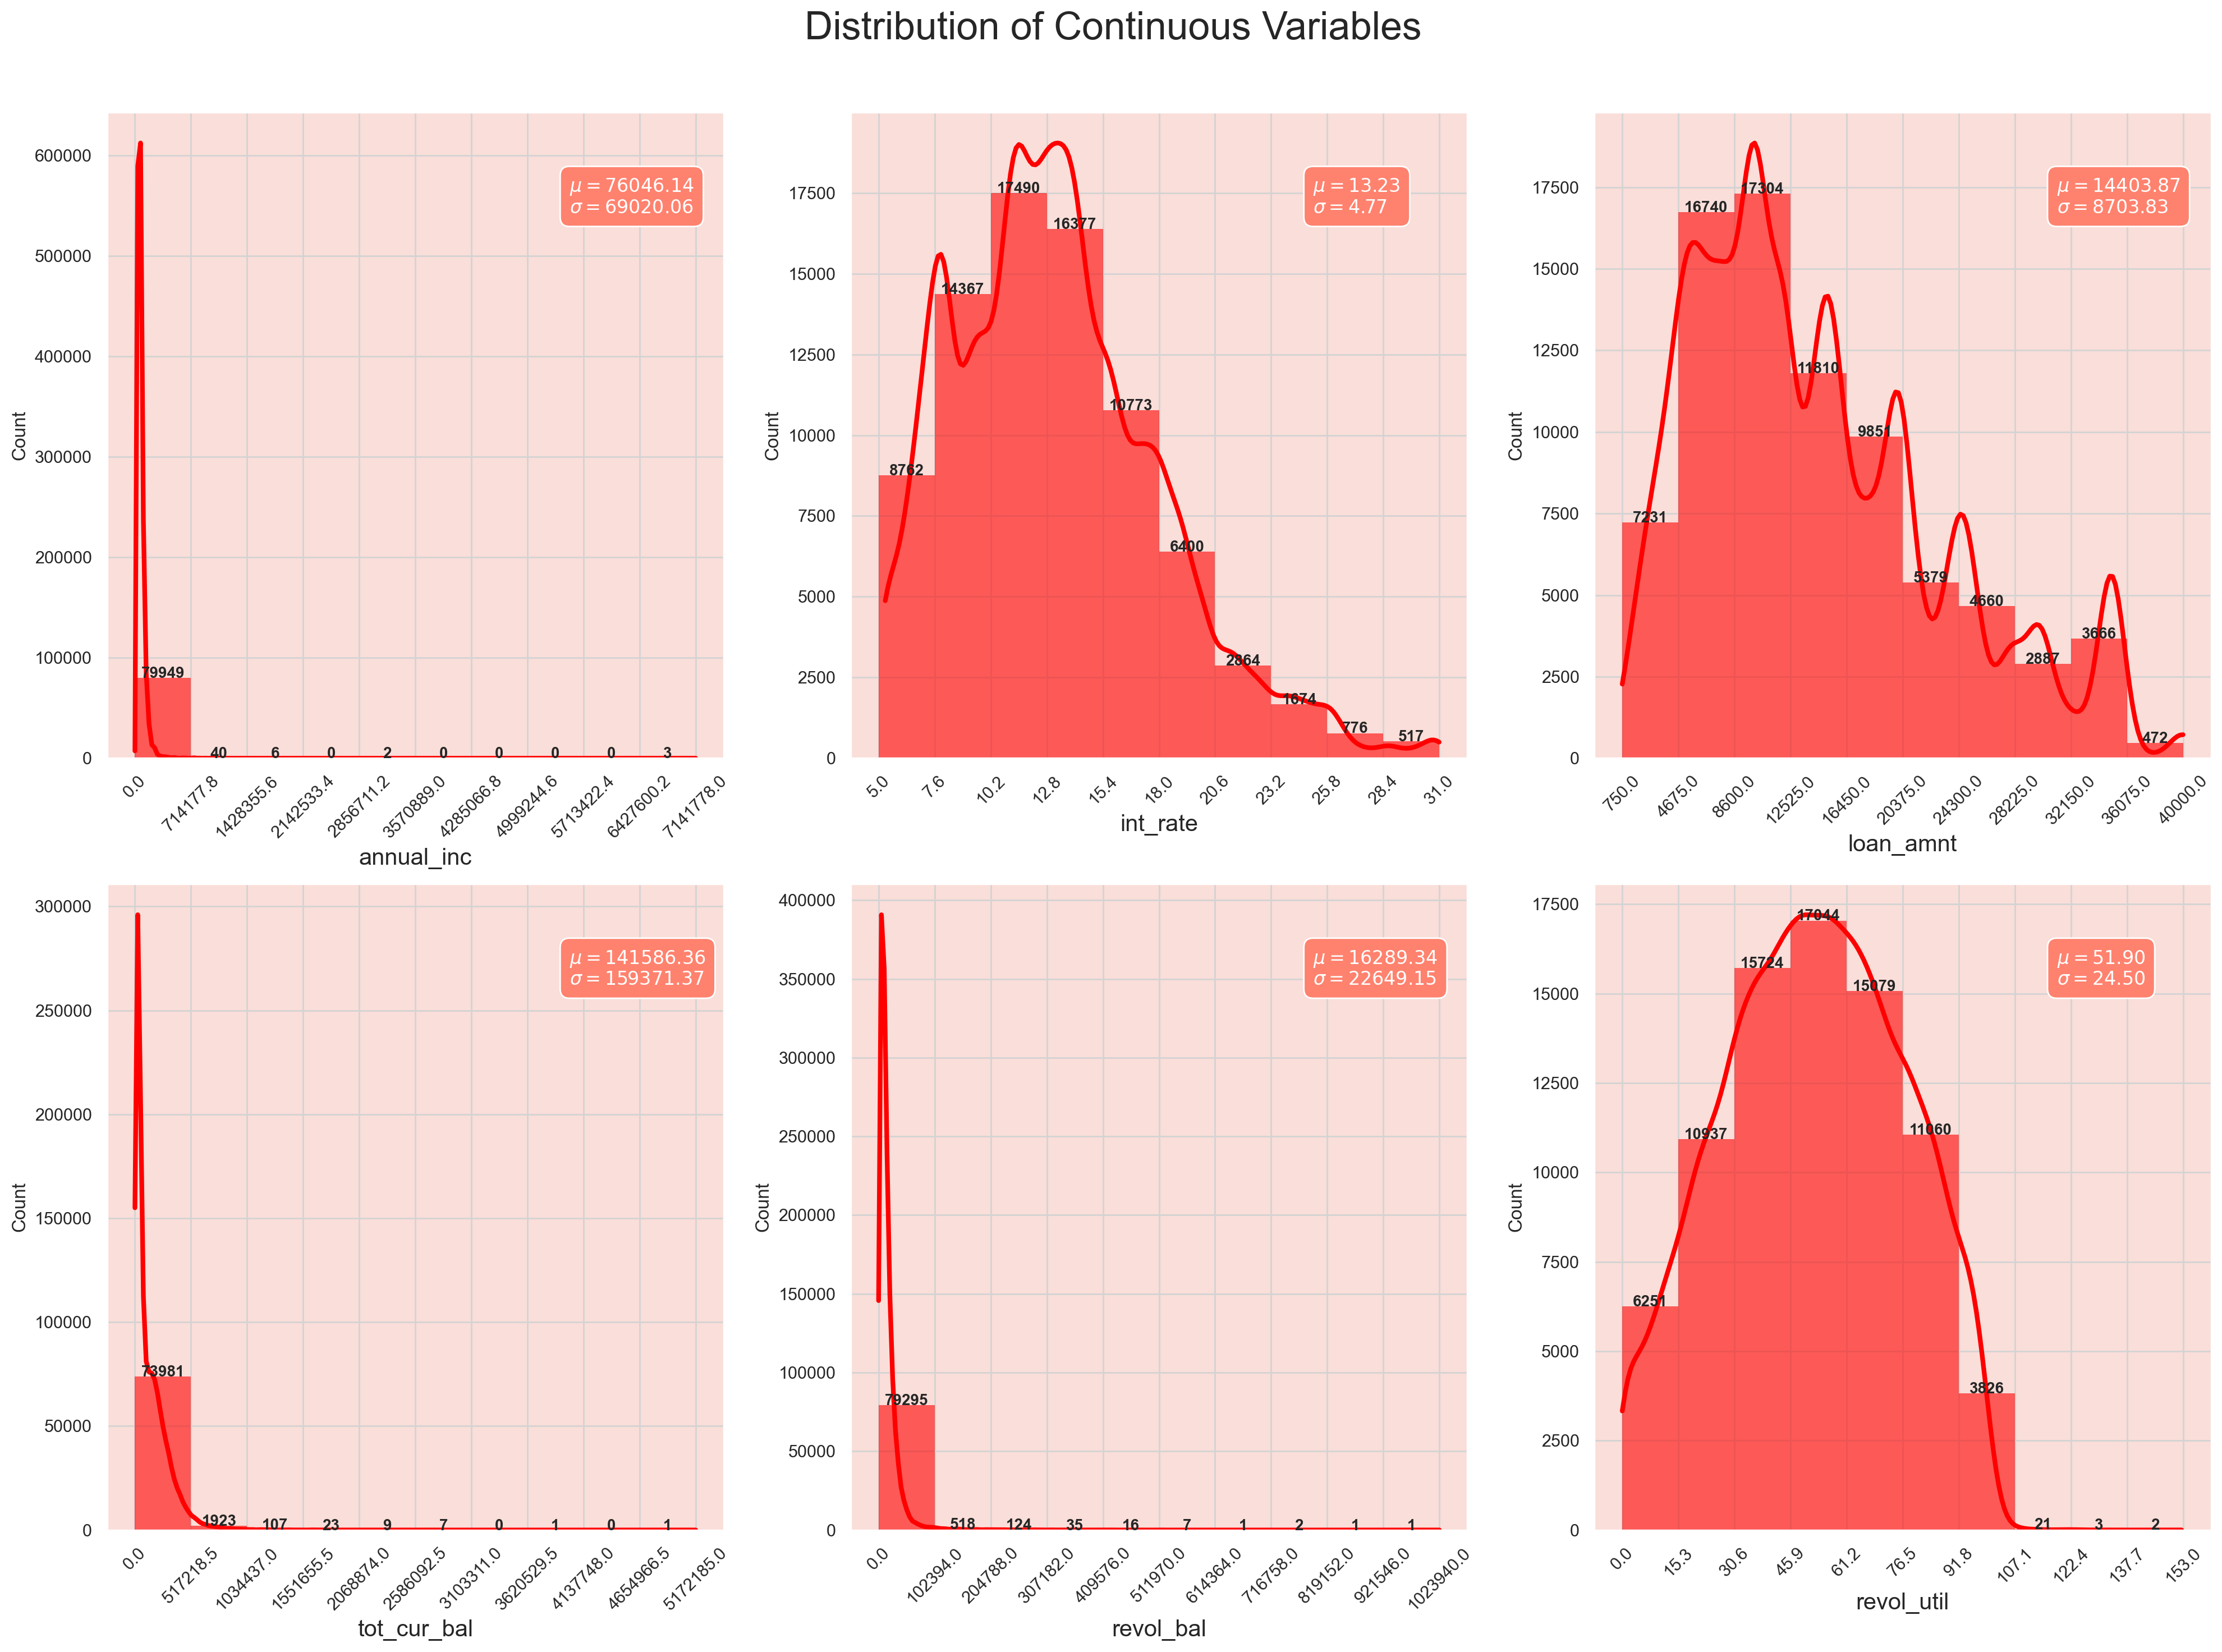

In [16]:
# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# ax[3,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li><b>Annual Income (annual_inc):</b>
    <ul style="list-style-type: disc; color: #004085;">
      <li>Right-skewed distribution with a peak at zero, suggesting missing or invalid income data.</li>
      <li>Average reported annual income: <b>\$76046</b>, standard deviation: <b>\$69020</b>.</li>
      <li>Understanding income variability is crucial for assessing financial stability and repayment capacity.</li>
    </ul>
    </li>
    <li><b>Interest Rate (int_rate):</b>
      <ul style="list-style-type: disc; color: #004085;">
        <li>The distribution of interest rates shows that the majority of applicants have interest rates between <b>7.6%</b> and <b>15.4%</b>.</li>
        <li>The average interest rate is <b>13.23%</b>, with a standard deviation of <b>4.77%</b>, indicating some variability in interest rates among loans.</li>
      </ul>
    </li>
    <li><b>Loan Amount:</b>
      <ul style="list-style-type: disc; color: #004085;">
        <li>The distribution of loan amounts shows a decreasing sinusoidal pattern from around <b>\$8600</b>.</li>
        <li>The average loan amount is approximately <b>\$14,404</b>, with a considerable standard deviation of <b>\$8704</b>, indicating significant variability in loan amounts among applicants.</li>
    </li>
    <li><b>Total Current Balance (tot_cur_bal):</b>
      <ul style="list-style-type: disc; color: #004085;">
        <li>The distribution of total current balances shows a high peak at 0, indicating that a significant proportion of applicants have no current balances.</li>
        <li>The presence of outliers, such as the maximum value of <b>\$5,172,185</b>, suggests extreme values that deviate significantly from the typical range of balances.</li>
        <li>The average total current balance is approximately <b>\$141,586.4</b>, with a considerable standard deviation of <b>\$159,371</b>, suggesting variability in total balances among applicants. </li>
      </ul>
    </li>
    <li><b>Revolving Balance (revol_bal):</b>
      <ul style="list-style-type: disc; color: #004085;">
        <li>The distribution of revolving balances shows a high peak increasing from 0 to around <b>\$50,000</b>, indicating that a significant proportion of applicants have relatively low to moderate revolving balances.</li> 
        <li>The average revolving balance is approximately <b>\$16,289</b>, with a considerable standard deviation of <b>\$22,649</b>, suggesting significant variability in revolving balances among applicants.</li>
      </ul>
    </li>
    <li><b>Revolving Line Utilization Rate (revol_util):</b>
      <ul style="list-style-type: disc; color: #004085;">
        <li>The distribution of revolving line utilization rates shows a somewhat normal distribution.</li>
        <li>The average revolving line utilization rate is approximately <b>51.93%</b>, with a standard deviation of <b>24.5%</b>, indicating variability in the utilization rates among applicants.</li>
      </ul>
    </li>
    </ul>
</div>


### 4.1.2: Categorical Features Univariate Analysis
<a id="4.1.2"></a>
 ⬆️[Table Contents](#table_content)

#### 4.1.2.1: Low Cardinality Categorical Features
<a id="4.1.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [17]:
# Filter low cardinality features for the univariate analysis, excluding 'type' column
low_cardinality_fea = ['application_type','grade','home_ownership','initial_list_status','term','verification_status','loan_status','emp_length', 'purpose','pub_rec','pub_rec_bankruptcies']
df_low_cardinality = df[low_cardinality_fea]

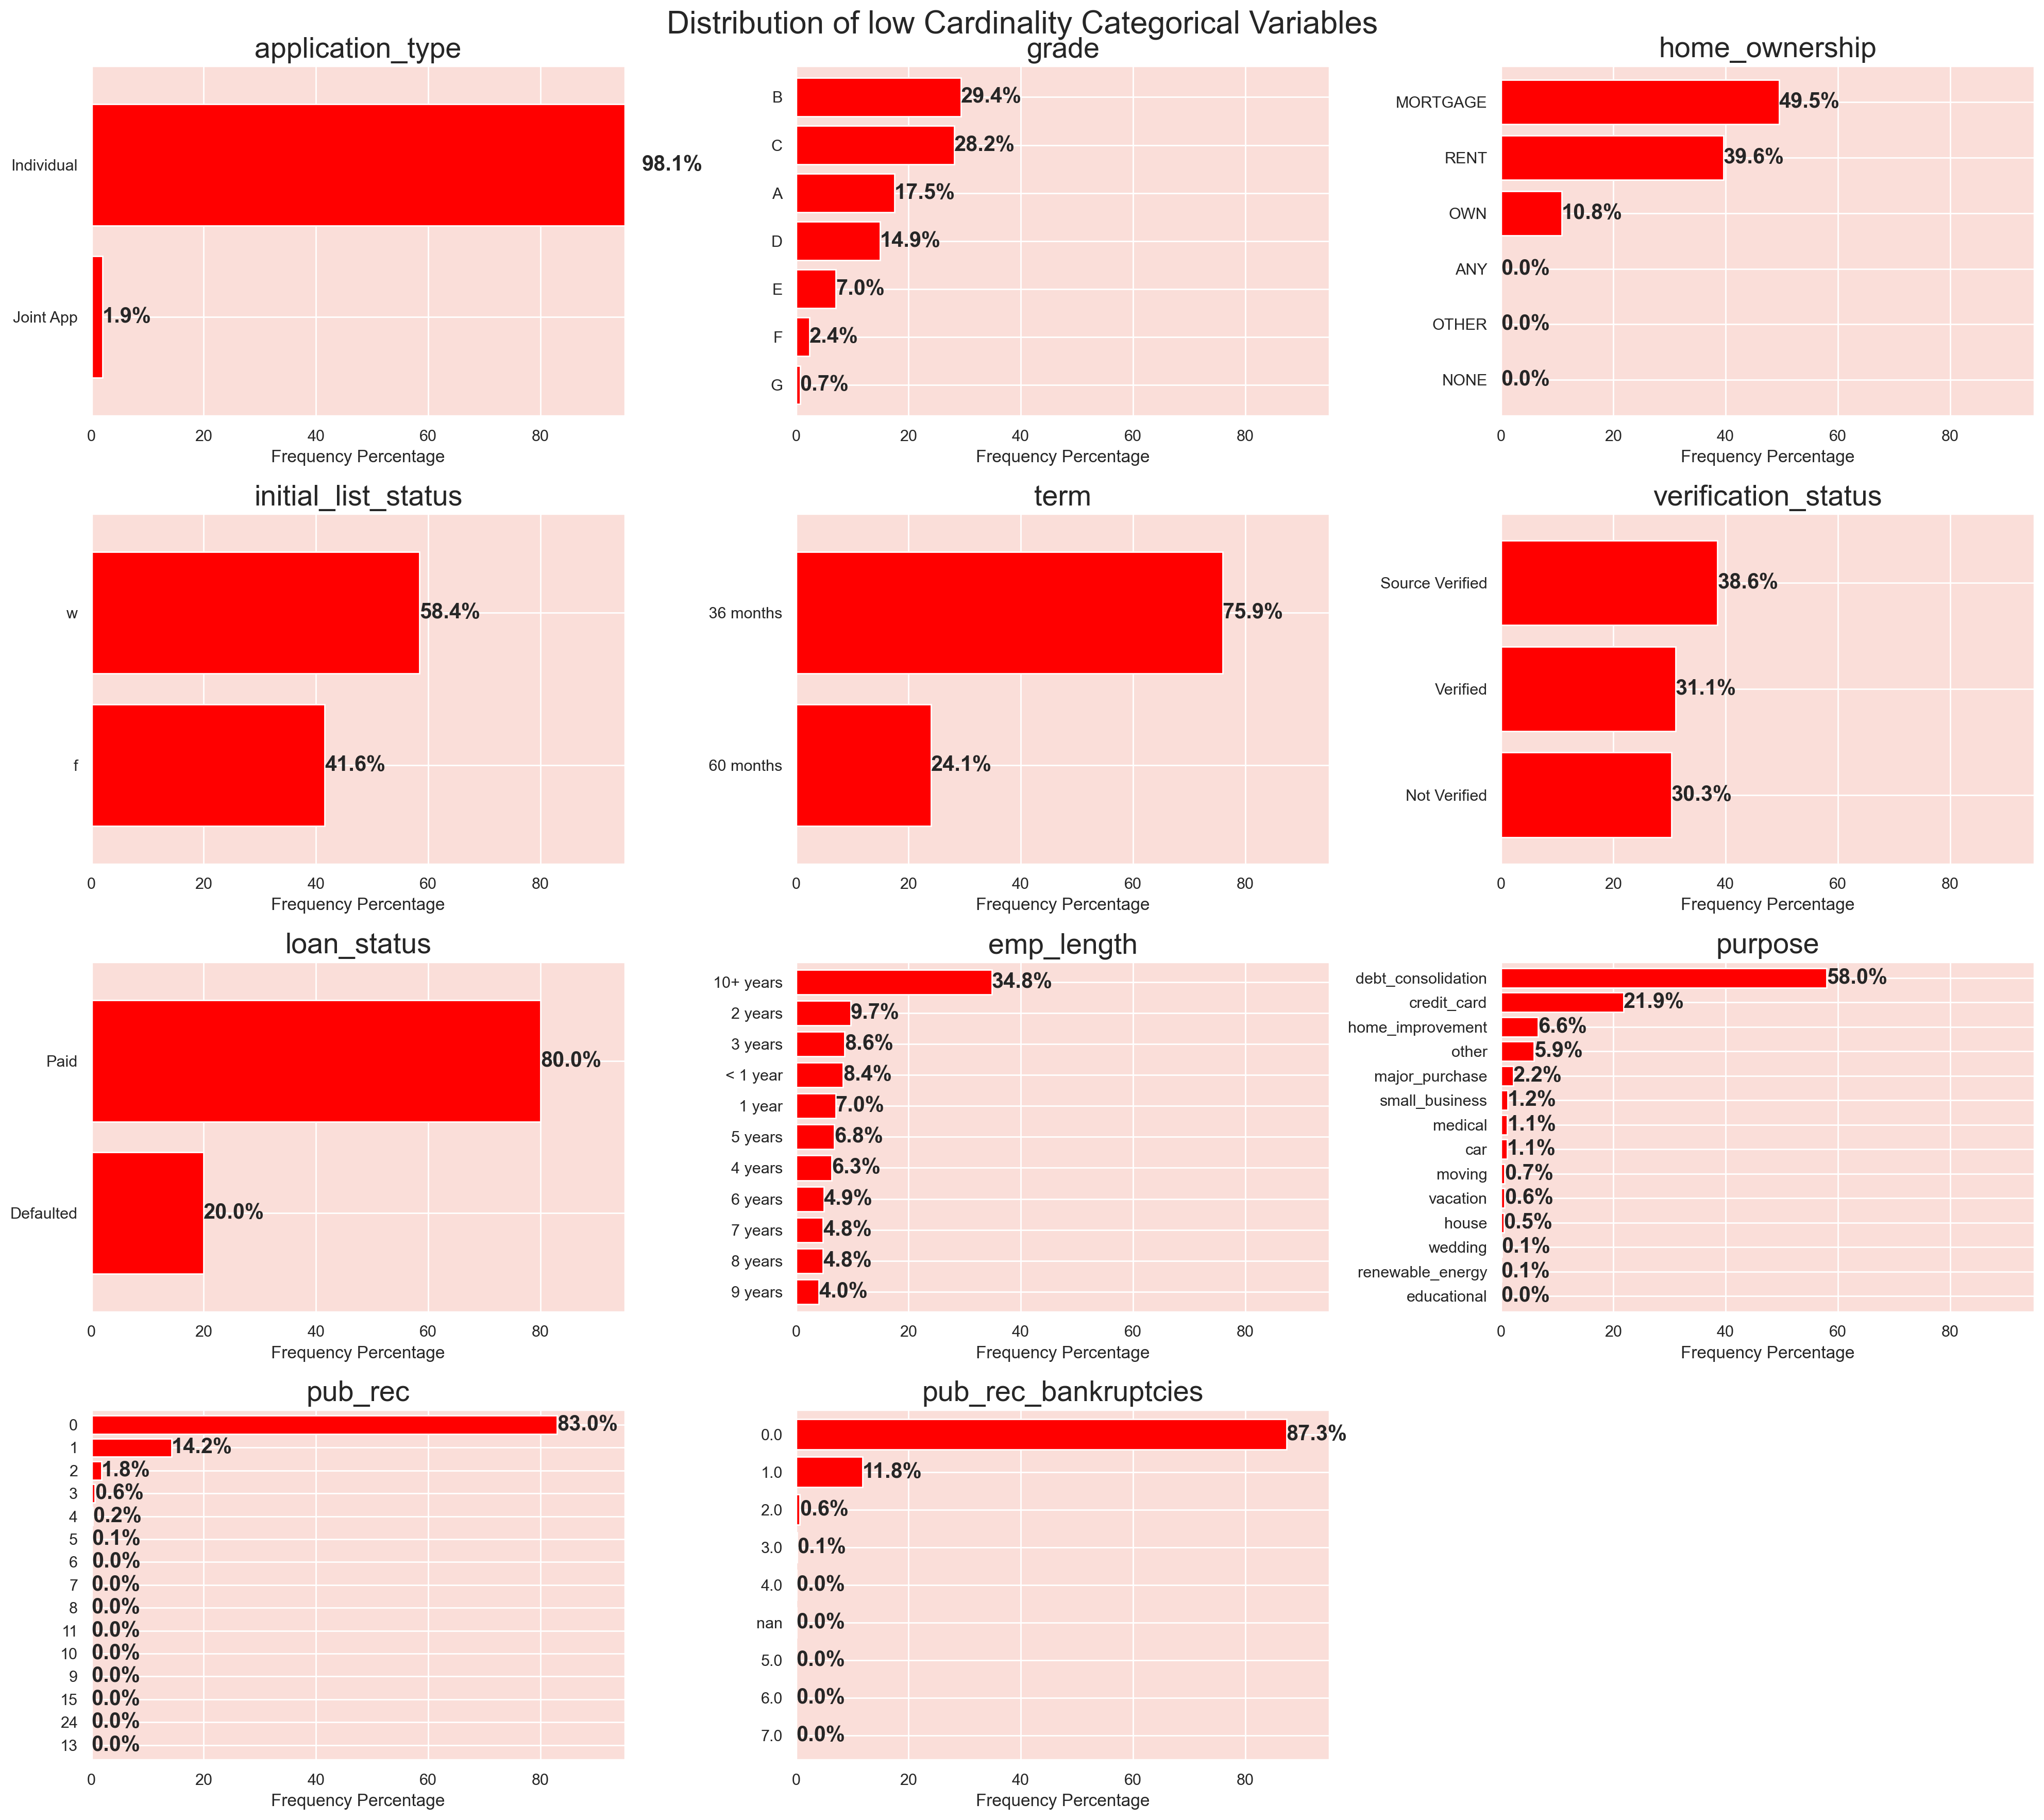

In [18]:
# Set up the subplot 
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(low_cardinality_fea):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[3,2].axis('off')
plt.suptitle('Distribution of low Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li><b>Application Type:</b> The majority of loan applications (98.1%) are from individuals rather than joint applications, indicating that individual borrowers are the primary applicants.</li>
    <li><b>Grade Distribution:</b> Grades "B" and "C" are the most common grades among loan applicants, suggesting that a significant proportion of applicants fall within these credit risk categories.</li>
    <li><b>Home Ownership:</b> The highest proportion of applicants indicate 'Mortgage' as their home ownership status, indicating that a substantial number of borrowers are homeowners with existing mortgages.</li>
    <li><b>Initial List Status:</b> The majority of loans have an initial listing status of 'W' (Whole), suggesting that most loans are initially listed as a whole rather than fractional.</li>
    <li><b>Loan Term:</b> The most preferred loan term among applicants is 36 months, indicating that a significant proportion of borrowers opt for shorter loan durations.</li>
    <li><b>Verification Status:</b> The majority of loan applicants have their income source as 'Source verified', with a somewhat balanced distribution between 'Verified' and 'Not Verified' statuses.</li>
    <li><b>Loan Status:</b> The most common loan status among applicants is 'Paid', indicating that a large number of borrowers have successfully repaid their loans.</li>
    <li><b>Employment Length:</b> Applicants with an employment length of '10+ years' are the most prevalent, indicating a significant number of borrowers with long-term employment.</li>
    <li><b>Purpose:</b> The most common purpose for loan applications is 'Debt Consolidation', followed by 'Credit Card', suggesting that many borrowers seek loans to consolidate existing debts or manage credit card balances.</li>
     <li><b>pub_rec:</b> most of the applicants have '0' and '1' Public Record items</li>
     <li><b>pub_rec_bankruptcies:</b> most of the applicants have '0' and '1' Public Record Bankruptcies</li>
</ul>
    
</div>


#### 4.1.2.2: High Cardinality Categorical Features
<a id="4.1.2.2"></a>
 ⬆️[Table Contents](#table_content)
 <br>
**WE will focus on only TOP10 from each one**

In [19]:
categorical_features = df.columns.difference(continuous_features)

In [20]:
# Filter high cardinality features for the univariate analysis, excluding 'type' column
high_cardinality_fea = list(set(categorical_features) - set(low_cardinality_fea))
df_high_cardinality = df[high_cardinality_fea]

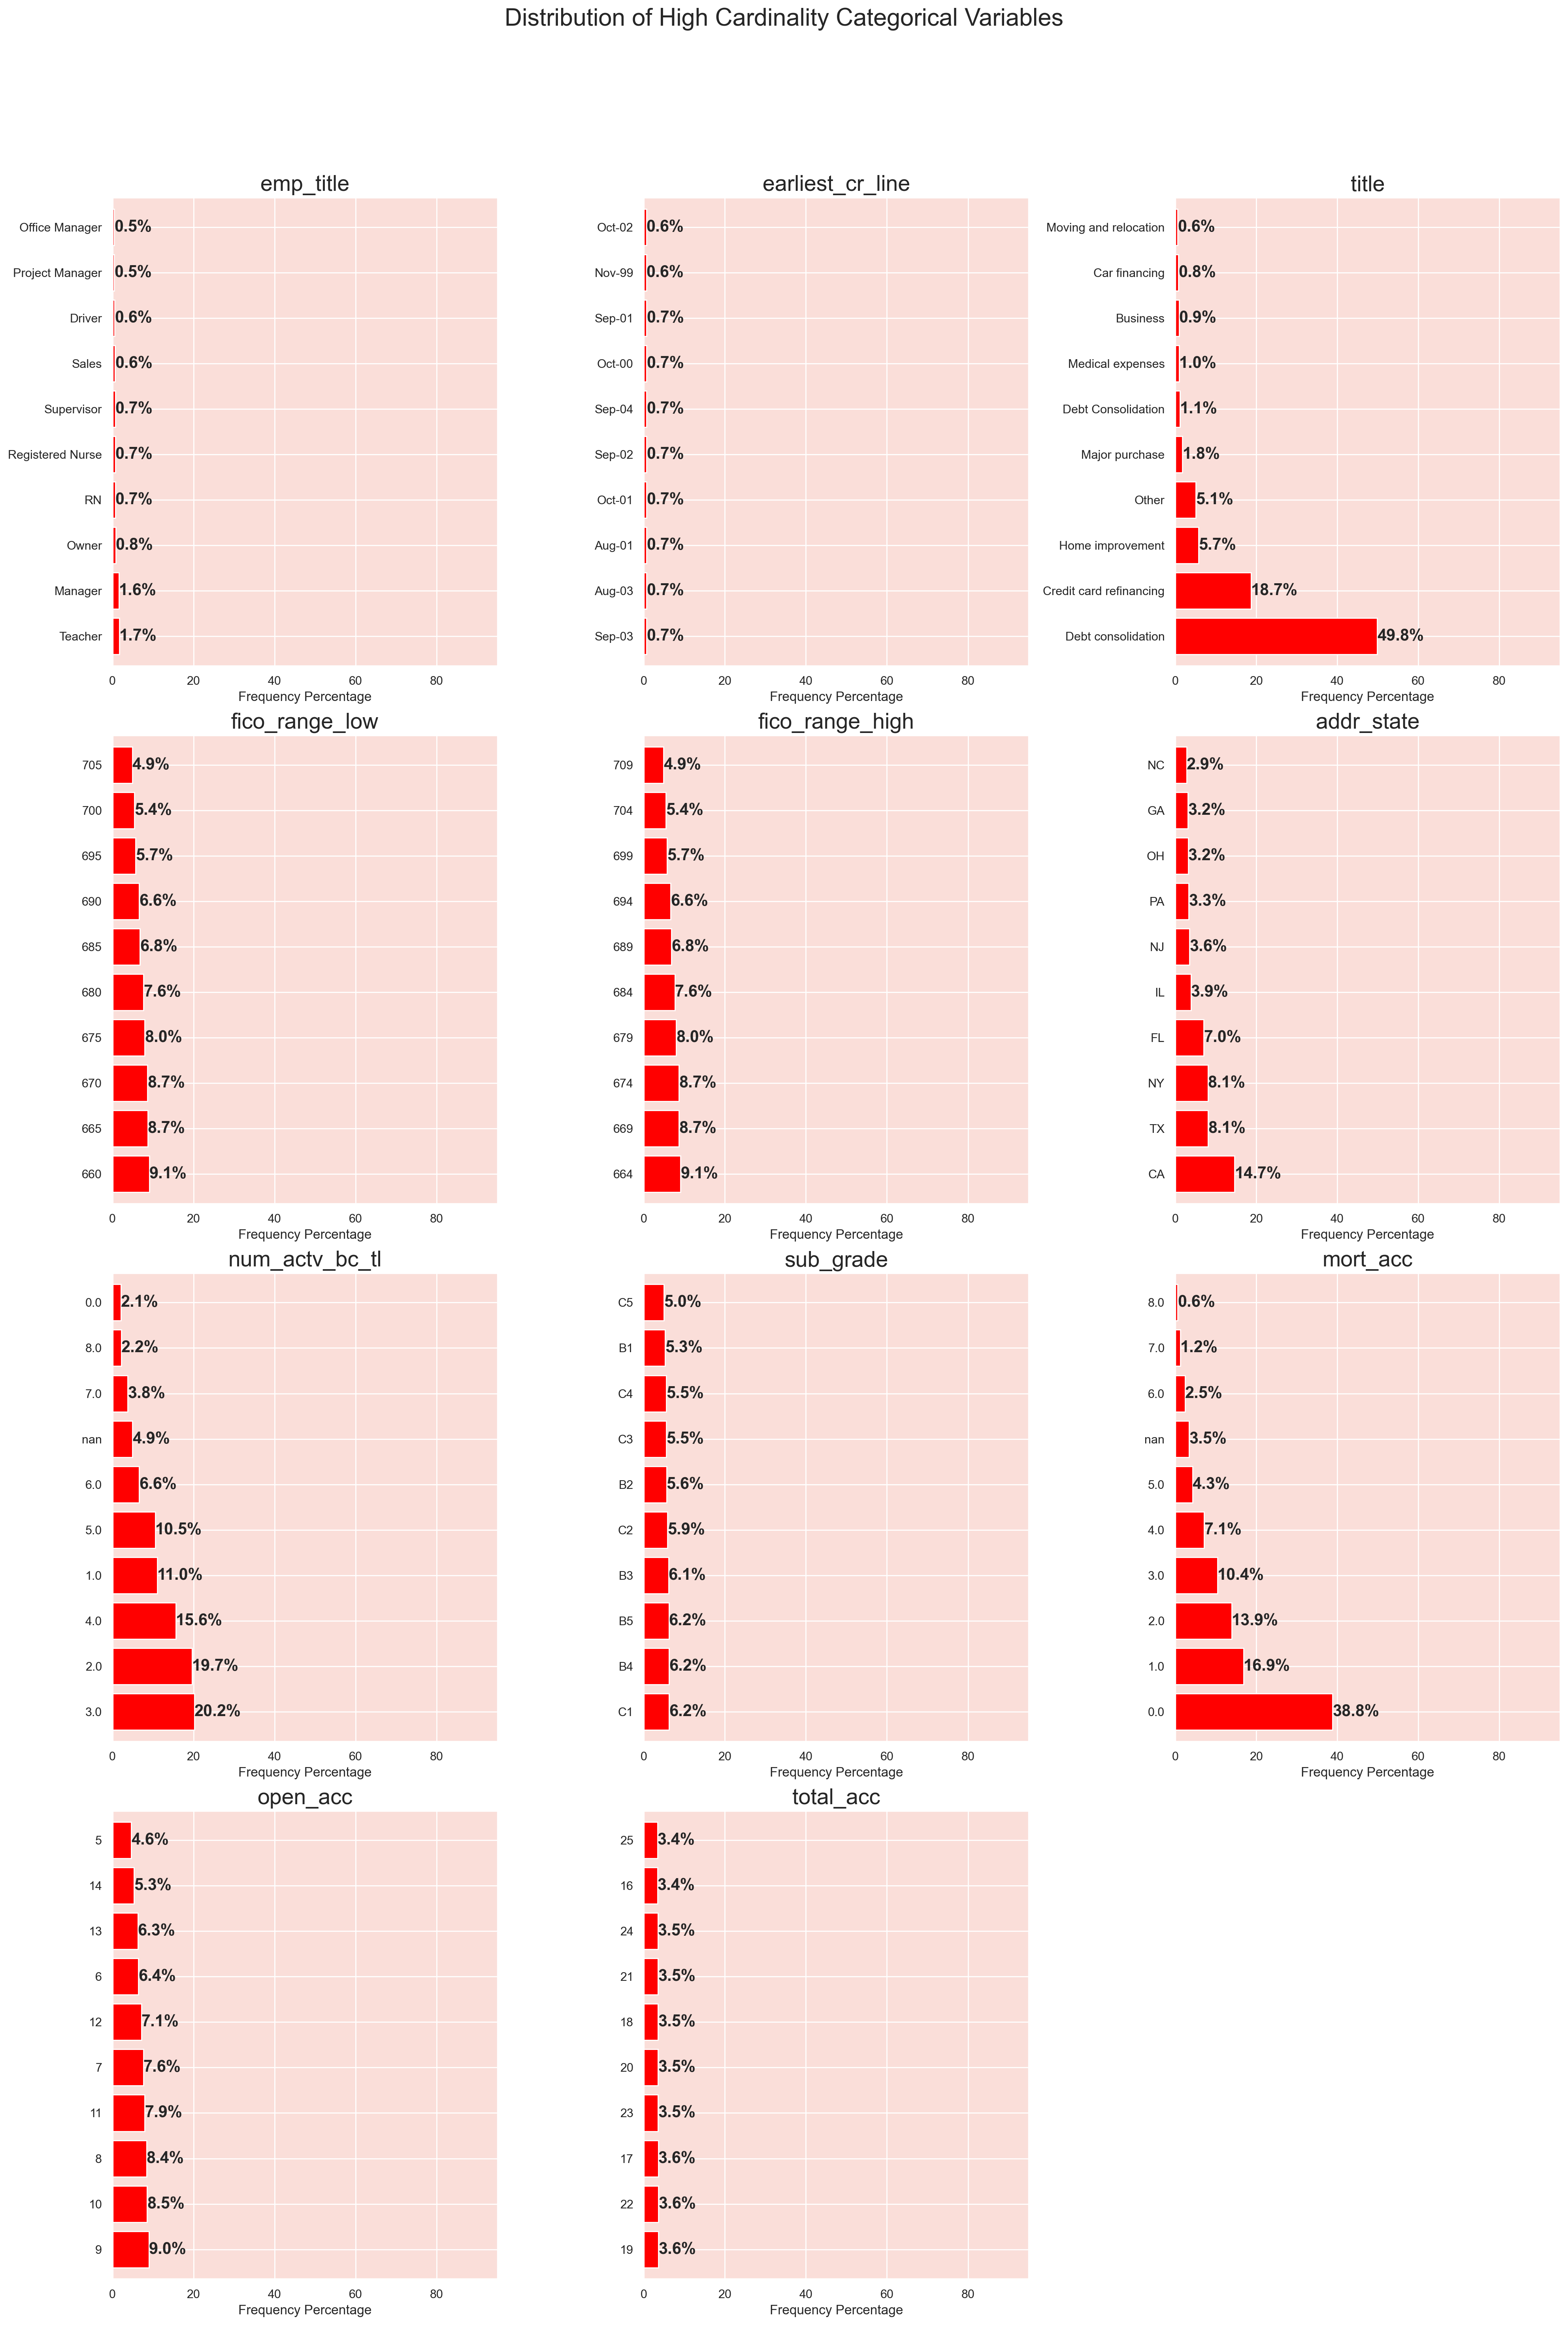

In [21]:
# Set up the subplot 
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 30))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(high_cardinality_fea):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(10)
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[3,2].axis('off')

plt.suptitle('Distribution of High Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Inference</b>:<br>
<ul>
    <li><b>FICO range high:</b> The FICO range high scores from 664 to 709 dominate, with 664 being the most prevalent at 9.1%, gradually decreasing thereafter.</li>
    <li><b>Active bankcard accounts (num_actv_bc_tl):</b> Approximately 20.2% of applicants have 3 active bankcard accounts, followed by 2 active accounts at 19.6%.</li>
    <li><b>Sub-Grade:</b> The most prevalent sub-grade is C1, constituting 6.3% of the total, followed closely by B4 and B5, each comprising approximately 6.2% and 6.1%, respectively. Sub-grades from the 'B' and 'C' categories dominate the top positions, with slight variations in percentages</li>
    <li><b>Total number of credit lines:</b> The most common count is 22, representing 3.6% of the dataset, followed closely by 23 and 19 at approximately 3.6% each</li>
    <li><b>Title:</b> The most common title for loan applications is 'Debt Consolidation', followed by 'Credit Card Refinancing', indicating that many borrowers seek loans for debt consolidation purposes or to refinance existing credit card balances.</li>
    <li><b>mortgage accounts:</b> The most prevalent count is 0, representing 38.8% of the dataset, followed by 1 at 16.9% and 2 at 13.9%</li>
    <li><b>State:</b> The state with the highest number of loan applicants is 'CA' (California), followed by 'TX' (Texas), indicating that these states have the highest demand for loans among borrowers.</li>
    <li><b>FICO range low:</b> The FICO range low scores from 660 to 705 dominate, with 600 being the most prevalent at 9.1%, gradually decreasing thereafter.</li>
    <li><b>Employment Title:</b> The most common employment title among loan applicants is 'Teacher', followed by 'Manager', suggesting that individuals in these professions are more likely to apply for loans.</li>
    <li><b>Open credit lines (open_acc):</b> The most common count is 9, comprising 9.0% of the dataset, followed by 10 at 8.5% and 8 at 8.4%</li>
    <li><b>Earliest Credit Line:</b> The distribution of earliest credit line dates shows that around 0.5% of applicants have their earliest credit line in Months from August - November, indicating a common occurrence for this specific time period among loan applicants.</li>

</ul>
</div>


## 4.2: Bivariate Analysis
<a id="4.2"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
     <h3>Note 📝:</h3>
    <br>
    For bivariate analysis, we will utilize the <code>train_df</code> dataframe as the <code>test_df</code> dataframe lacks a target feature. This ensures consistency in the analysis and modeling process.

</div>


### 4.2.1: Numerical Features vs Target (loan_status)
<a id="4.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [22]:
continuous_features = train_df.describe().columns
tarin_df_continuous = train_df[continuous_features]

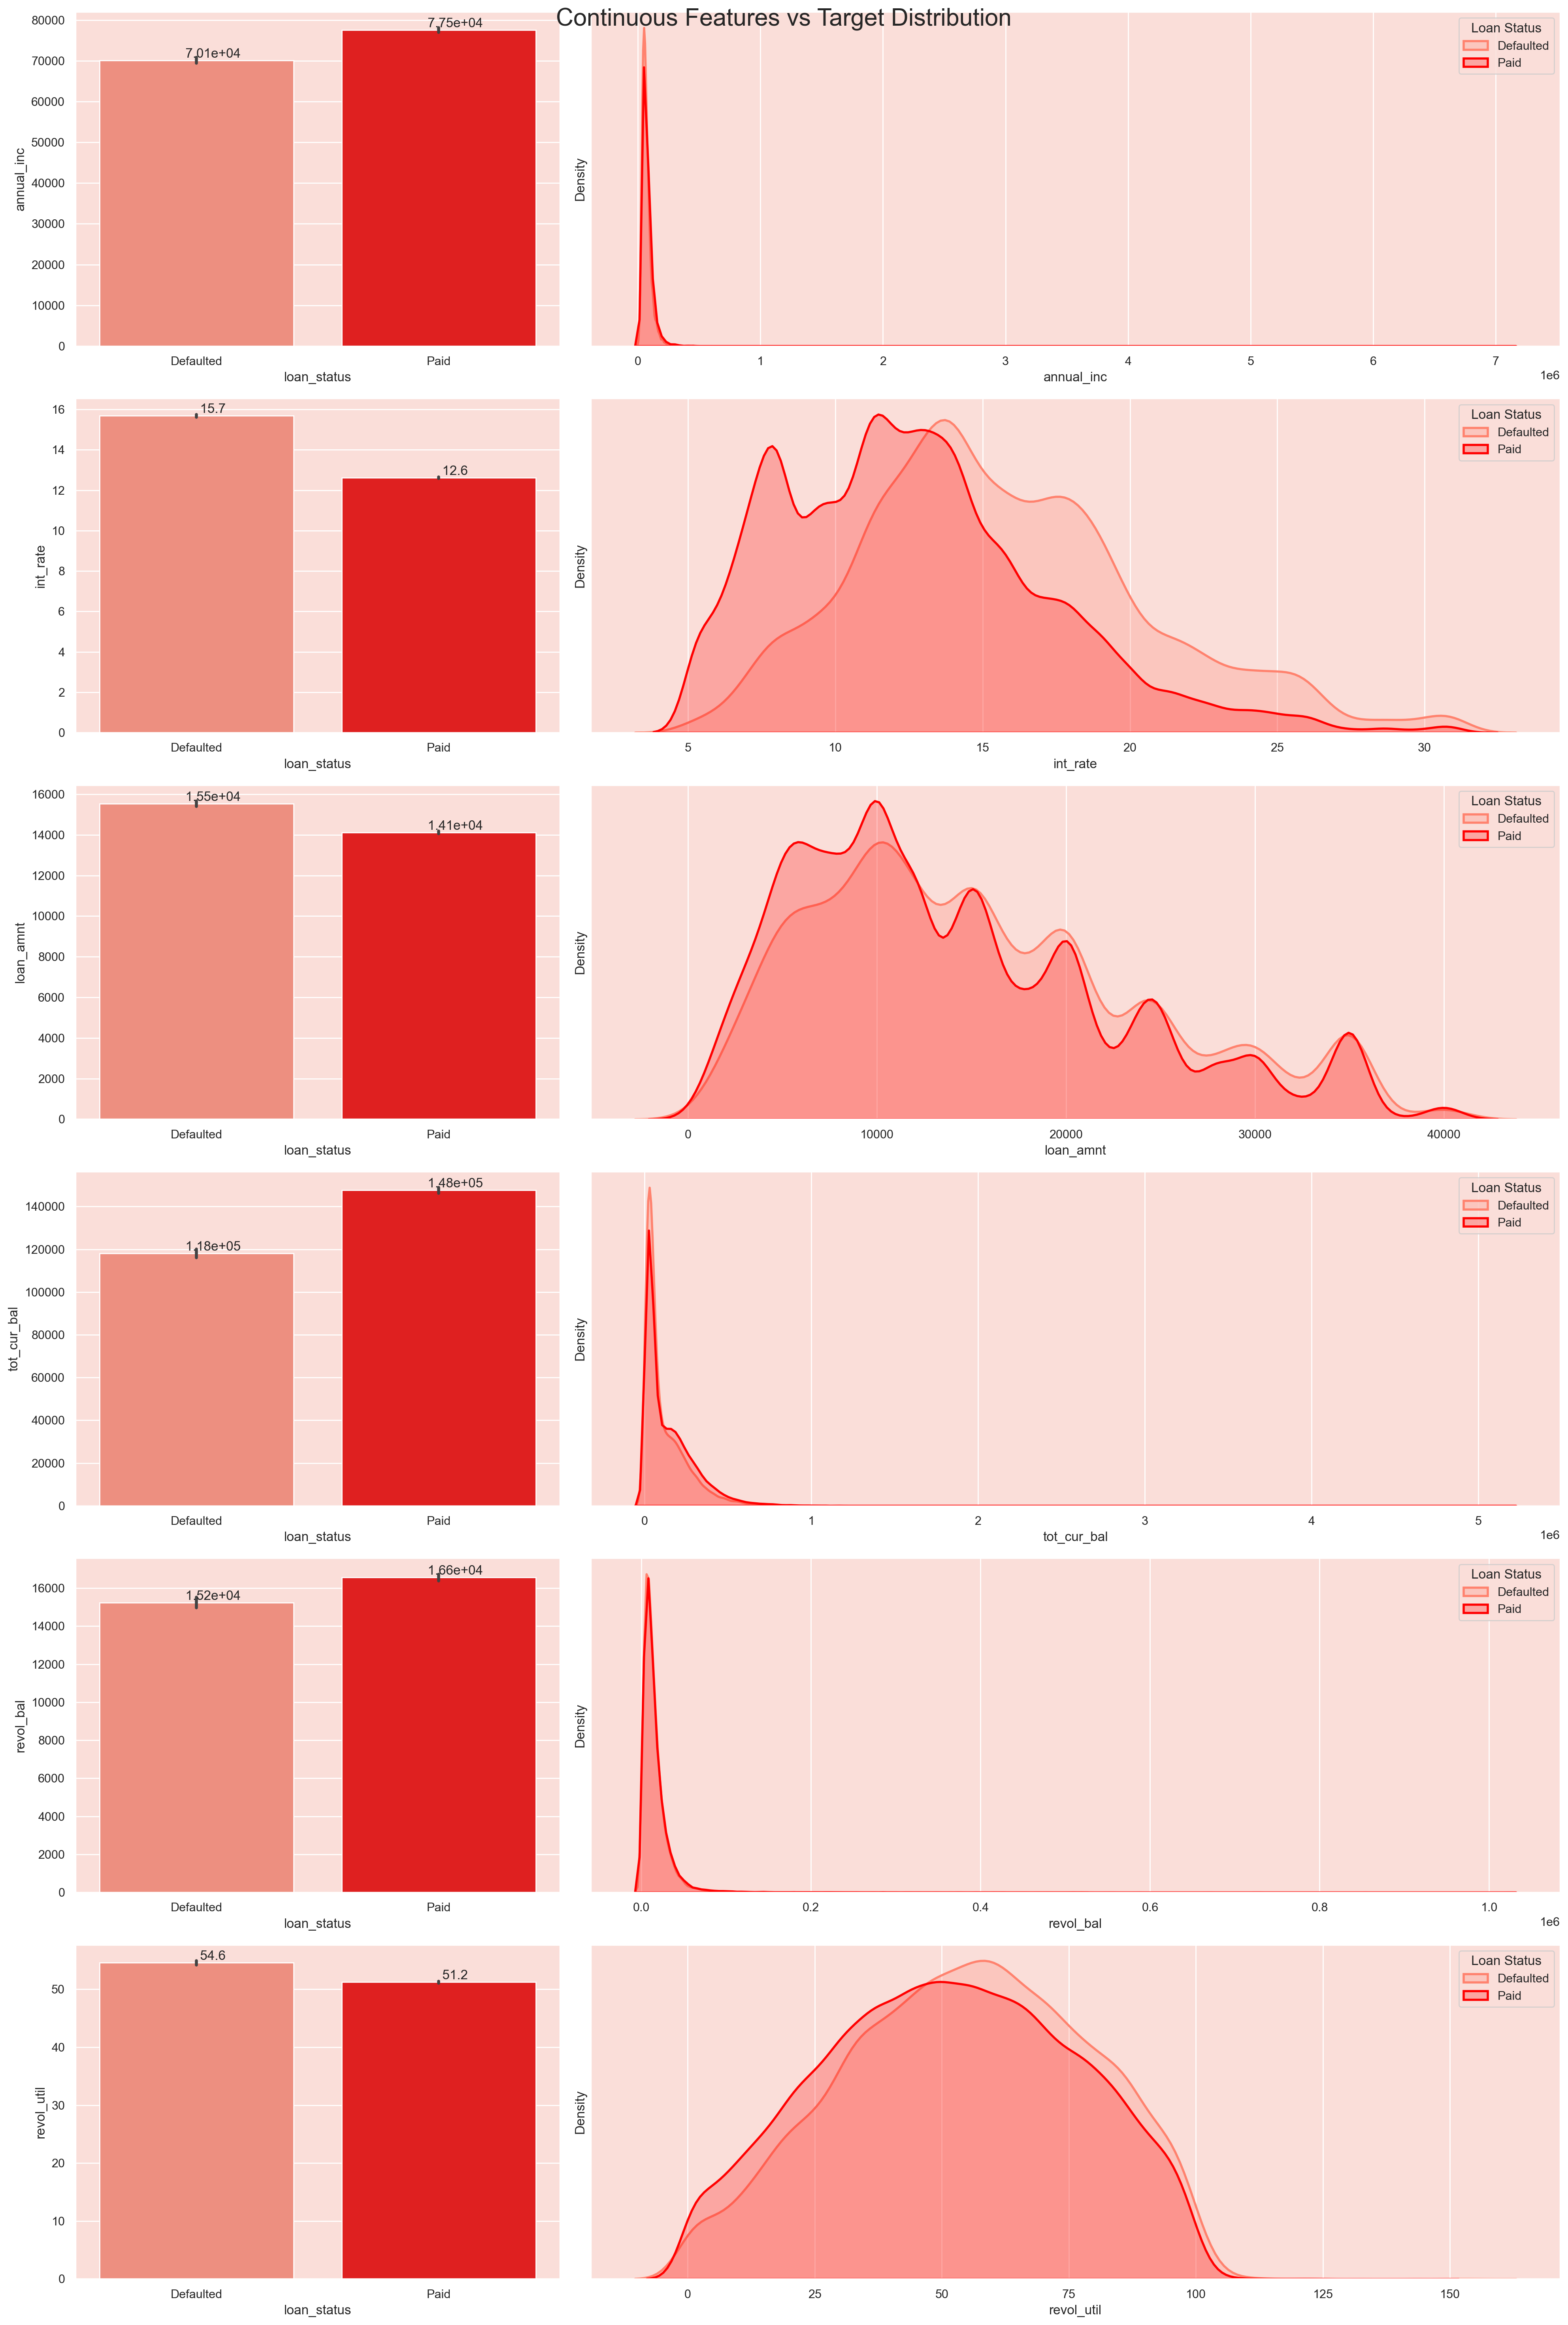

In [23]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(20,30), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=train_df, x="loan_status", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=train_df[train_df["loan_status"]=='Defaulted'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Defaulted')
    sns.kdeplot(data=train_df[train_df["loan_status"]=='Paid'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Paid')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Loan Status', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Inference</b>:<br>
<ul>
    <li>The bivariate analysis conducted with respect to the target feature (<code>loan_status</code>) reveals notable differences in the distributions of certain continuous features between the "Paid" and "Default" categories.</li>
    <li>Features such as <b>int_rate</b>, <b>loan_amount</b>, and <b>revol_util</b> exhibit higher mean for the "Defaulted" category compared to the "paid" category.</li>
    <li>This suggests that these features may have a significant impact on the likelihood of a loan defaulting, warranting further investigation and consideration in predictive modeling and risk assessment.</li>
</ul>
    
</div>


### 4.2.2: Categorical Features vs Target (loan_status)
<a id="4.2.2"></a>
 ⬆️[Table Contents](#table_content)

#### 4.2.2.1: Low Cardinality Categorical Features vs Target (loan_status)
<a id="4.2.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [24]:
# Remove 'loan_status' from the low_cardinality_features
low_cardinality_fea = [feature for feature in low_cardinality_fea if feature != 'loan_status']

low_cardinality_fea

['application_type',
 'grade',
 'home_ownership',
 'initial_list_status',
 'term',
 'verification_status',
 'emp_length',
 'purpose',
 'pub_rec',
 'pub_rec_bankruptcies']

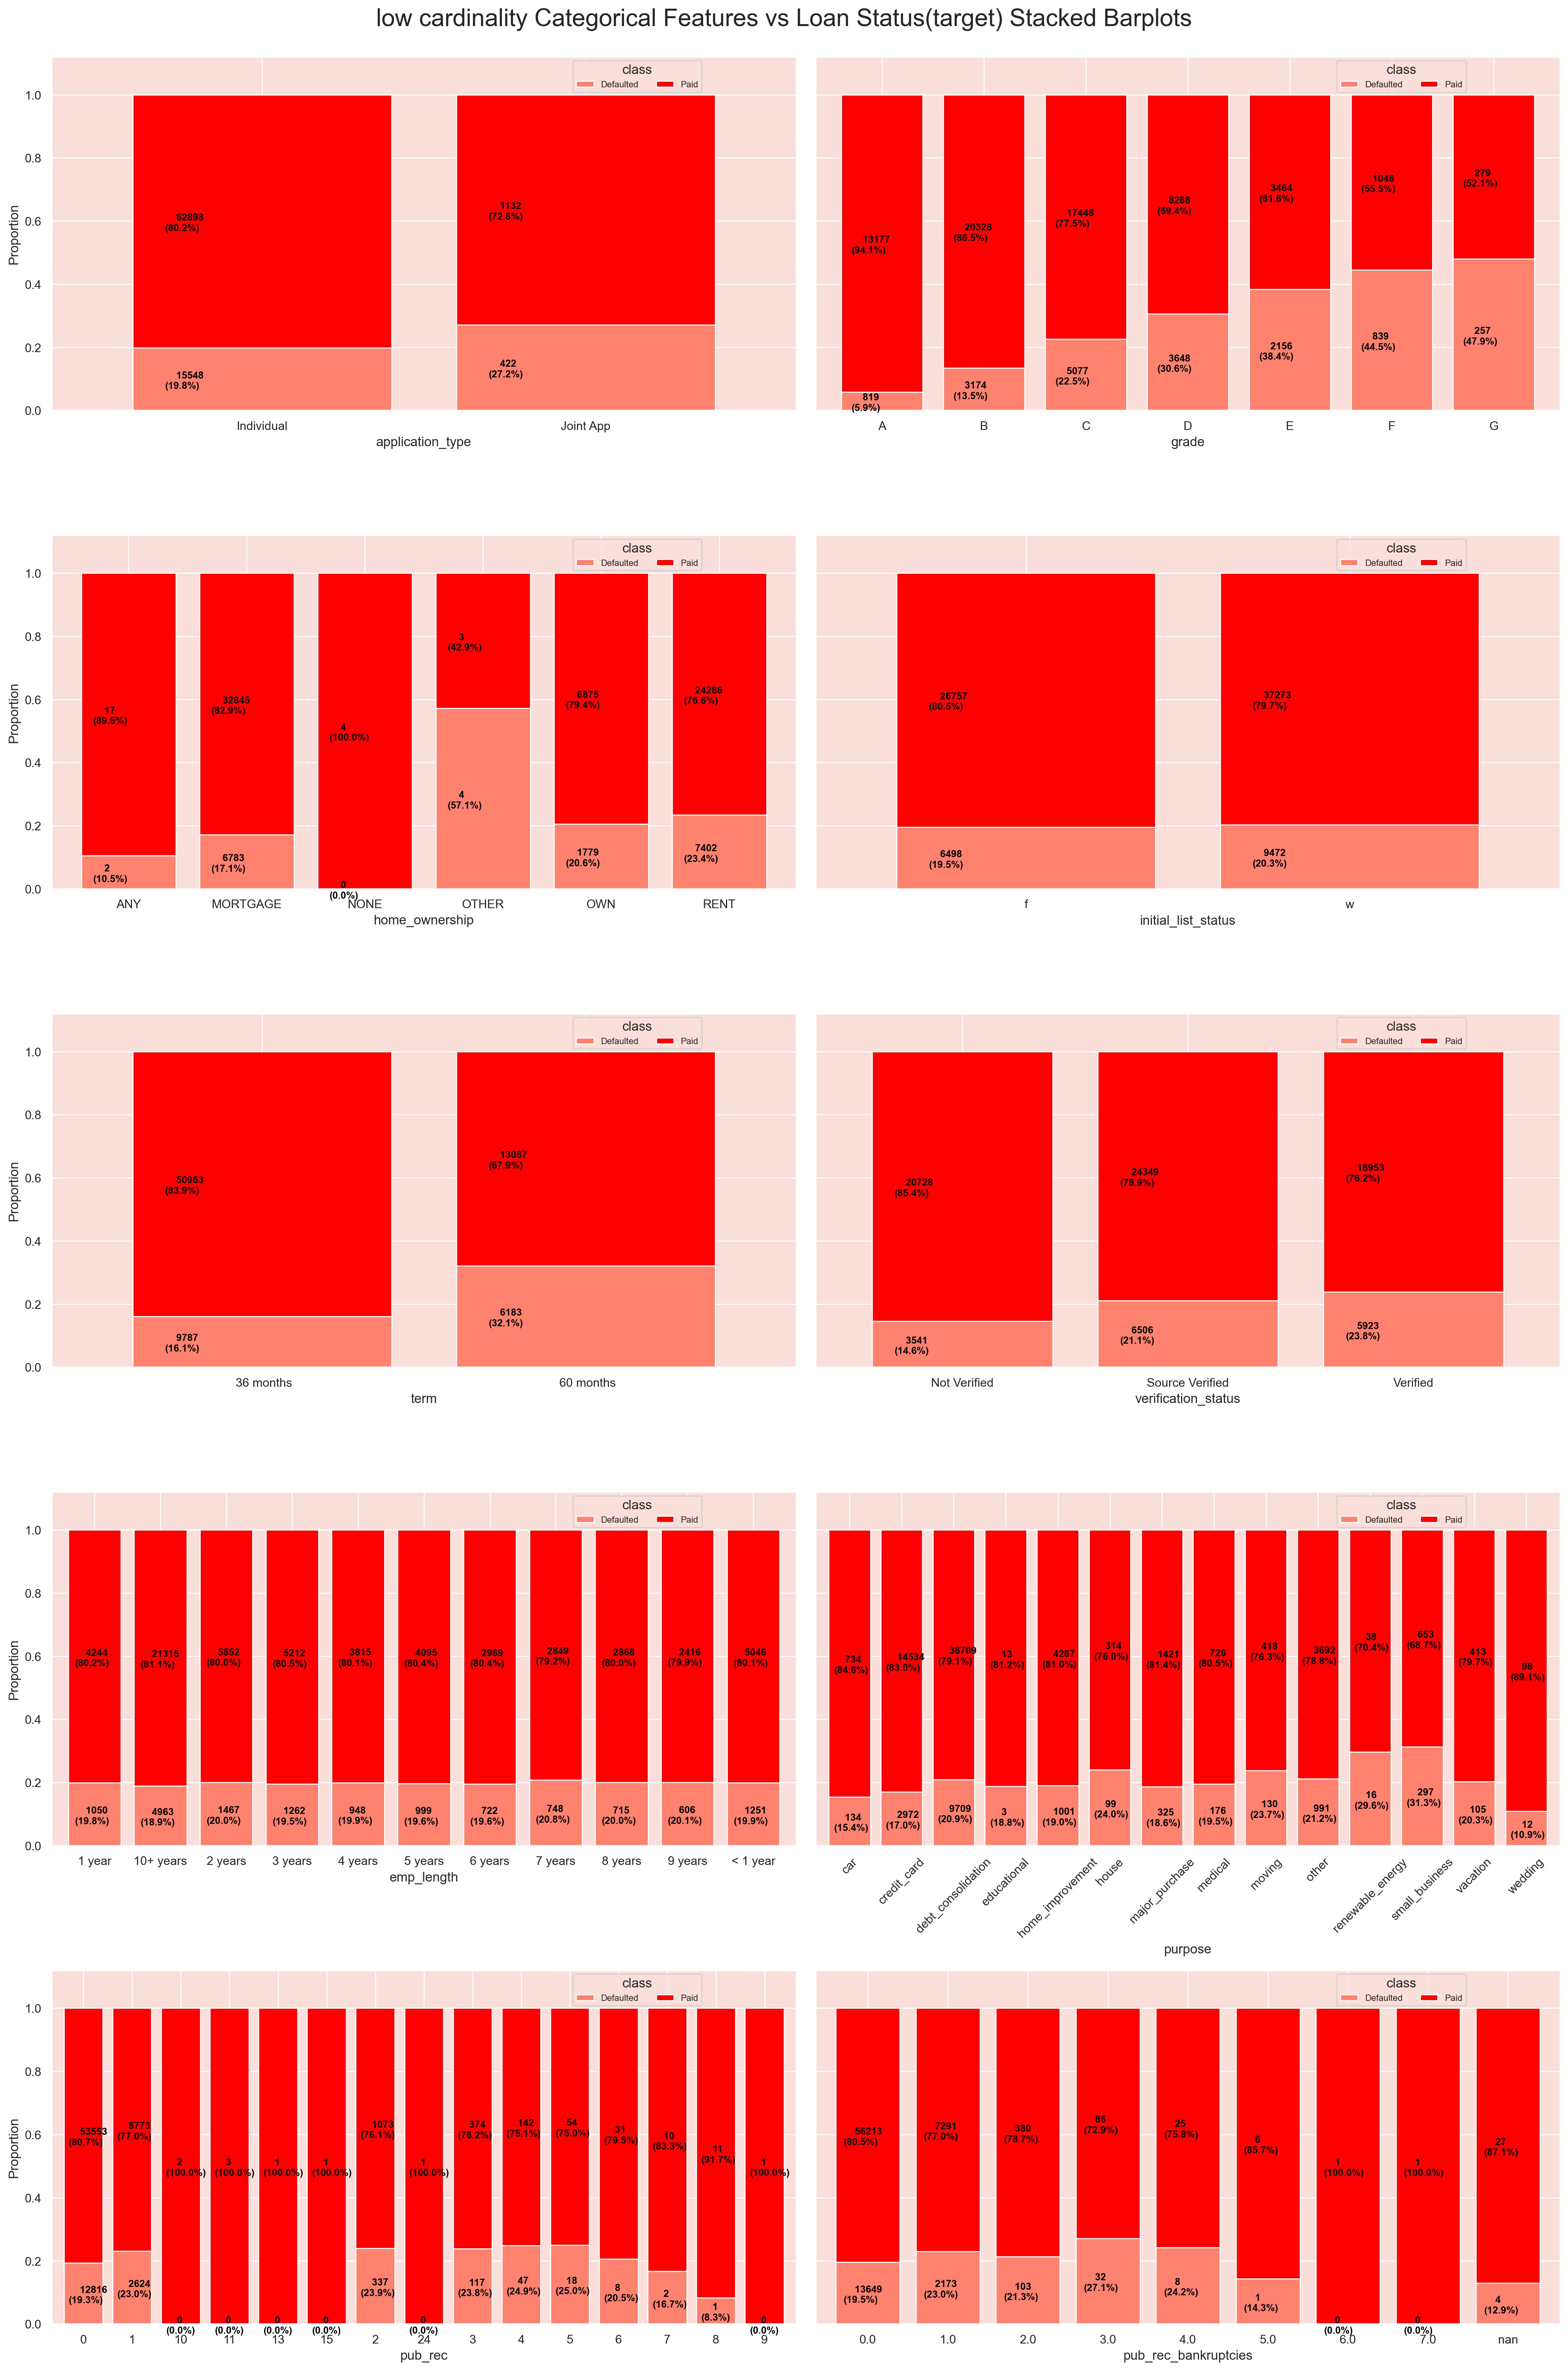

In [25]:
# Calculate the number of required subplots
num_plots = len(low_cardinality_fea)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(low_cardinality_fea):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=train_df[col], columns=train_df['loan_status'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=train_df[col], columns=train_df['loan_status'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='class', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)
    
ax[3, 1].set_xticklabels(ax[3, 1].get_xticklabels(), rotation=45)   
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('low cardinality Categorical Features vs Loan Status(target) Stacked Barplots', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Inference</b>:<br>
<ul>
    <li>Upon analyzing the low cardinality categorical features, it's evident that they are directly associated with the loan status labeled as "Paid".</li>
    <li>For instance, the feature <b>home_ownership</b> with the category "NONE" exhibits all loan statuses as "Paid", indicating a potential bias in this category.</li>
    <li>Similarly, the feature <b>grade</b> with the category "G" shows somewhat equal proportions of loan statuses, which might suggest a different pattern compared to other grades.</li>
    <li>The feature <b>pub_rec</b> with the categories "10","9","10","11","13" and "15" exhibits all loan statuses as "Paid", indicating a potential bias in this category.</li>
    <li>Also,the feature <b>pub_rec_bankruptcies</b> with the categories "6" and "7" exhibits all loan statuses as "Paid", indicating a potential bias in this category.</li>
    <li>This direct association of certain categories with the "Paid" loan status hints at potential biasness in the dataset, which will be addressed in the subsequent data preprocessing and feature engineering steps to ensure fairness and model accuracy.</li>
</ul>
    
</div>

#### 4.2.2.2: High Cardinality Categorical Features vs Target (loan_status)
<a id="4.2.2.2"></a>
 ⬆️[Table Contents](#table_content)

In [26]:
high_cardinality_fea

['emp_title',
 'earliest_cr_line',
 'title',
 'fico_range_low',
 'fico_range_high',
 'addr_state',
 'num_actv_bc_tl',
 'sub_grade',
 'mort_acc',
 'open_acc',
 'total_acc']

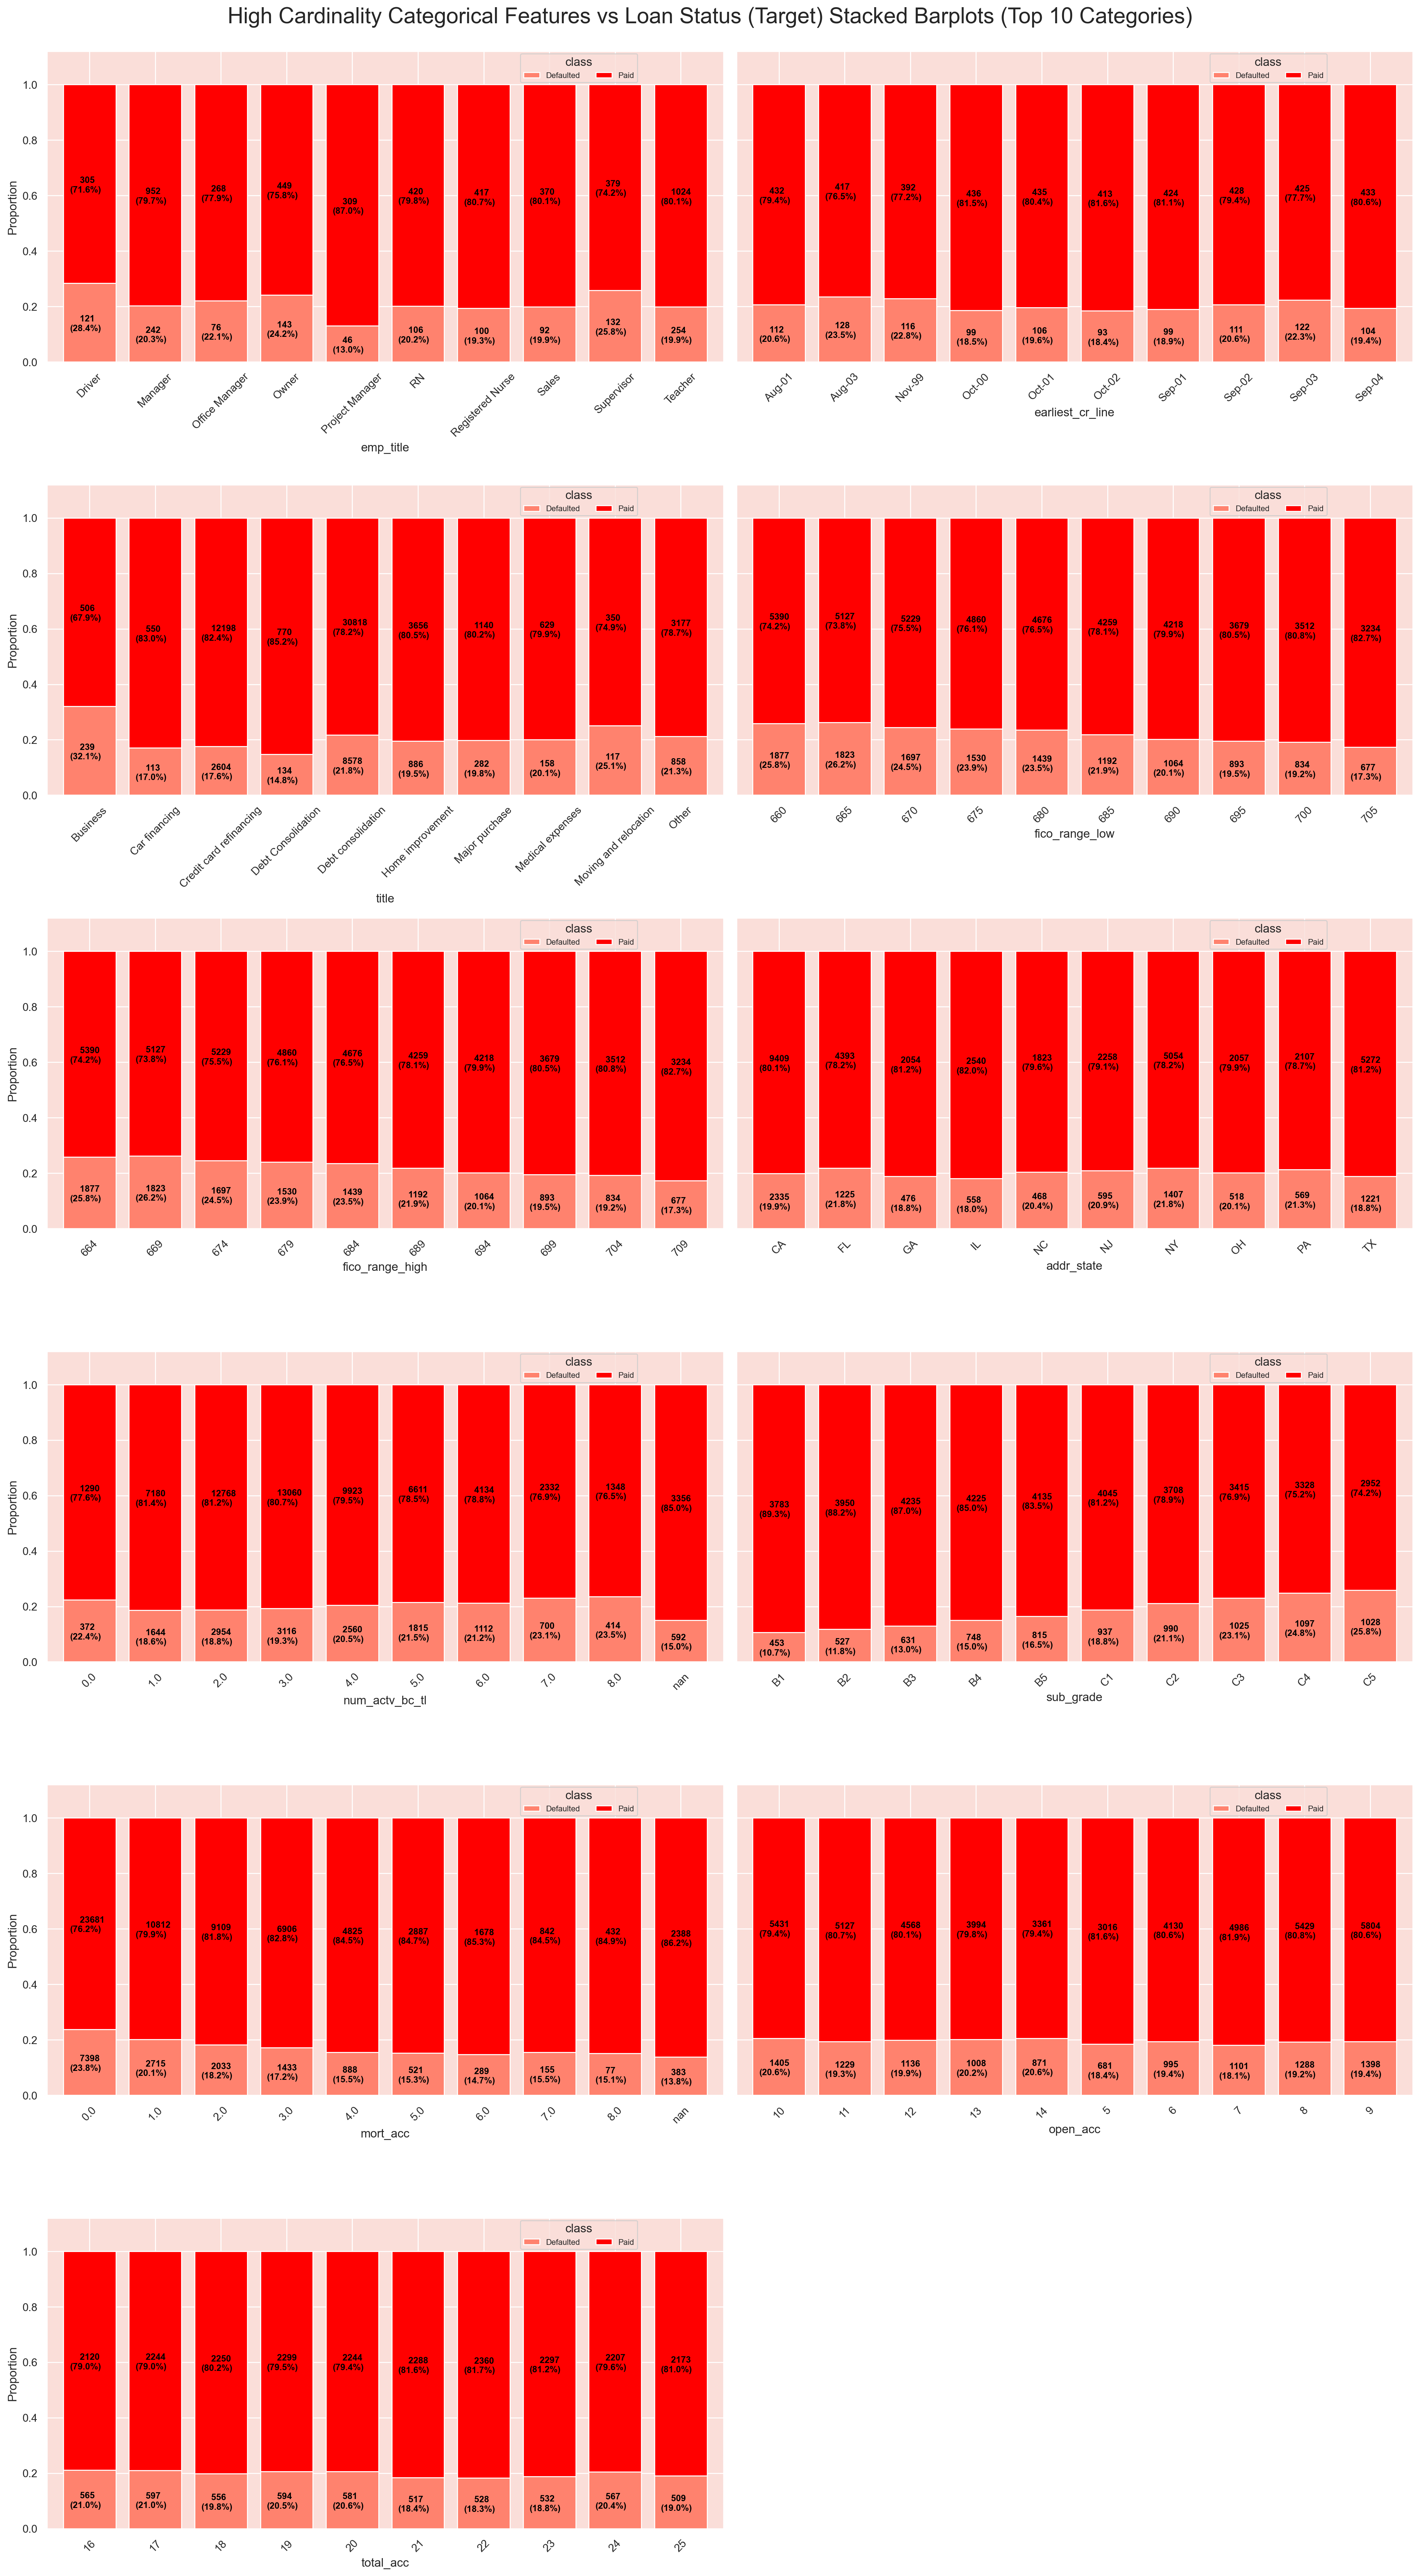

In [27]:
# Calculate the number of required subplots
num_plots = len(high_cardinality_fea)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(high_cardinality_fea):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Get the top 10 most occurring categories
    top_categories = train_df[col].value_counts().head(10).index
    
    # Subset the dataframe to include only the top 10 categories
    subset_df = train_df[train_df[col].isin(top_categories)]
    
    # Create a cross tabulation showing the proportion of loan statuses for each category of the feature
    cross_tab = pd.crosstab(index=subset_df[col], columns=subset_df['loan_status'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=subset_df[col], columns=subset_df['loan_status'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='class', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=45)
    
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('High Cardinality Categorical Features vs Loan Status (Target) Stacked Barplots (Top 10 Categories)', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Inference</b>:<br>
<ul>
    <li>Upon analyzing the high cardinality categorical features, it's evident that they are directly associated with the loan status labeled as "Paid".</li>
    <li>This direct association of certain categories with the "Paid" loan status hints at potential biasness in the dataset, which will be addressed in the subsequent data preprocessing and feature engineering steps to ensure fairness and model accuracy.</li>
</ul>
    
</div>

# <p id="2" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">5: Data Preprocessing</p>
<a id="5"></a>
 ⬆️[Table Contents](#table_content)

# 5.1: Feature Engineering
<a id="5.1"></a>
 ⬆️[Table Contents](#table_content)

## 5.1.1: High Cardinal Categorical Features
<a id="5.1.1"></a>
 ⬆️[Table Contents](#table_content)

In [28]:
# Create a dataframe with the number of unique categories and missing values for each high-cardinality feature
high_cardinality_features = high_cardinality_fea
unique_categories = train_df[high_cardinality_features].nunique()
missing_values = train_df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})

high_cardinality_df

Unique_Categories  Missing_Values
emp_title                     36661            5018
earliest_cr_line                640               0
title                          5348             970
fico_range_low                   38               0
fico_range_high                  38               0
addr_state                       51               0
num_actv_bc_tl                   29               0
sub_grade                        35               0
mort_acc                         29               0
open_acc                         56               0
total_acc                       107               0

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

<b>Feature Engineering Actions:</b><br>
<ul>
    <li><b>Address State (addr_state):</b> Grouping the states of the USA into regions to provide a more generalized view of geographical location.</li>
    <li><b>Earliest Credit Line (earliest_cr_line):</b> Converting categories into datetime format to simplify the data while retaining temporal information.</li>
    <li><b>Employment Title (emp_title):</b> Removing this feature due to the large number of categories. However, it can be grouped into common domain roles or only the top N most frequent roles can be retained, with the rest grouped into an 'Other' category if needed in future work.</li>
    <li><b>Sub Grade (sub_grade):</b> Dropping this feature as it is directly related to the grade feature, making it redundant and increasing data dimensionality.</li>
    <li><b>Title:</b> Dropping this feature as it is directly related to the purpose feature, which would increase data dimensionality.</li>
    <li><b>FICO Range Low and High:</b> we will create a new feature based on the FICO range's low and high values. The aim is to categorize FICO scores into different groups such as Poor, Fair, Good, and Excellent.</li>
    <li><b>Mortgage Account:</b> Grouping all accounts with values greater than zero into 1.</li>    
</ul>

<p>By performing these feature engineering actions, we aim to simplify the dataset while retaining important information relevant to the loan domain. This will help in reducing the dimensionality of the data and improving the efficiency of subsequent analysis and modeling.</p>
</div>


### addr_state

In [29]:
# Define mapping of states to regions
state_to_region = {
    'CT': 'Northeast',
    'ME': 'Northeast',
    'MA': 'Northeast',
    'NH': 'Northeast',
    'RI': 'Northeast',
    'VT': 'Northeast',
    'NJ': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'MI': 'Midwest',
    'OH': 'Midwest',
    'WI': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'NE': 'Midwest',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'MD': 'South',
    'NC': 'South',
    'SC': 'South',
    'VA': 'South',
    'DC': 'South',
    'WV': 'South',
    'AL': 'South',
    'KY': 'South',
    'MS': 'South',
    'TN': 'South',
    'AR': 'South',
    'LA': 'South',
    'OK': 'South',
    'TX': 'South',
    'AZ': 'West',
    'CO': 'West',
    'ID': 'West',
    'MT': 'West',
    'NV': 'West',
    'NM': 'West',
    'UT': 'West',
    'WY': 'West',
    'AK': 'West',
    'CA': 'West',
    'HI': 'West',
    'OR': 'West',
    'WA': 'West'
}

# Map states to regions and drop addr_state column
train_df['region'] = train_df['addr_state'].map(state_to_region)
train_df.drop(columns=['addr_state'], inplace=True)

test_df['region'] = test_df['addr_state'].map(state_to_region)
test_df.drop(columns=['addr_state'], inplace=True)

### earliest_cr_line

In [30]:
# Convert 'earliest_cr_line' to datetime format
train_df['earliest_cr_line'] = pd.to_datetime(train_df['earliest_cr_line'], format='%b-%y')

# Now you can access the year component using the .dt accessor
train_df['earliest_cr_line'] = train_df['earliest_cr_line'].dt.year

In [31]:
# Convert 'earliest_cr_line' to datetime format
test_df['earliest_cr_line'] = pd.to_datetime(test_df['earliest_cr_line'], format='%b-%Y')

# Now you can access the year component using the .dt accessor
test_df['earliest_cr_line'] = test_df['earliest_cr_line'].dt.year

### fico_range_high & fico_range_low

<img src="https://www.experian.com/blogs/ask-experian/wp-content/img/experian-good-score-ranges-fico.png">

In [32]:
# Convert 'fico_range_low' and 'fico_range_high' to numerical type
train_df['fico_range_low'] = train_df['fico_range_low'].astype(float)
train_df['fico_range_high'] = train_df['fico_range_high'].astype(float)

# Calculate average FICO score
train_df['avg_fico_score'] = (train_df['fico_range_low'] + train_df['fico_range_high']) / 2

# Create bins and labels for FICO score ranges
bins = [299, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Bin the average FICO score
train_df['fico_score_category'] = pd.cut(train_df['avg_fico_score'], bins=bins, labels=labels)


In [33]:

test_df['fico_range_low'] = test_df['fico_range_low'].astype(float)
test_df['fico_range_high'] = test_df['fico_range_high'].astype(float)

# Calculate average FICO score
test_df['avg_fico_score'] = (test_df['fico_range_low'] + test_df['fico_range_high']) / 2

test_df['fico_score_category'] = pd.cut(test_df['avg_fico_score'], bins=bins, labels=labels)

In [34]:
# Drop the 'avg_fico_score','fico_range_low','fico_range_high' columns, no longer needed
train_df.drop(columns=['avg_fico_score','fico_range_low','fico_range_high'],axis=1, inplace=True)
test_df.drop(columns=['avg_fico_score','fico_range_low','fico_range_high'],axis=1, inplace=True)

### mort_acc

In [35]:
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [36]:
train_df['mort_acc'] = train_df['mort_acc'].astype(float)
train_df['mort_acc'] = train_df.mort_acc.apply(mort_acc)

In [37]:
test_df['mort_acc'] = test_df['mort_acc'].astype(float)
test_df['mort_acc'] = test_df.mort_acc.apply(mort_acc)

### sub_grade, title, emp_title

In [38]:
train_df.drop(columns=['sub_grade','title','emp_title'],axis=1, inplace=True)
test_df.drop(columns=['sub_grade','title','emp_title'],axis=1, inplace=True)

## 5.1.2: Low Cardinal Categorical Features
<a id="5.1.2"></a>
 ⬆️[Table Contents](#table_content)


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
<b>Feature Engineering Actions:</b><br>

<ul>
    <li><b>home_ownership:</b> We notice a direct association between the "NONE" category and the "paid" category in the target feature. To address this, we will group "NONE," "ANY," and "OTHER" into an "Other" category.</li>
    <li><b>term:</b> We observe two unique categories: 36 months and 60 months. To align with its semantics, we will convert this feature into numeric values representing the respective term lengths.</li>
    <li><b>emp_length:</b> 
Based on bivariate analysis, emp_length exhibits significant bias towards the "paid" category in the target feature. Consequently, we opt to drop this feature. However, we may consider grouping it into "< 1 year" and "10+ years" for future analysis, pending discussion with business stakeholders regarding its relevance in the loan domain.</li>
    <li><b>purpose:</b> We will group the categories based on their specific domain knowledge and requirements.</li>
    <li><b>Public Record:</b> Grouping all records with values greater than zero into 1.</li>
    <li><b>Public Record Bankruptcies:</b> Grouping all records with values greater than zero into 1.</li>
</ul>
<p>By performing these feature engineering actions, we aim to simplify the dataset while retaining important information relevant to the loan domain. This will help in reducing the dimensionality of the data and improving the efficiency of subsequent analysis and modeling.</p>
</div>

In [39]:
low_cardinality_fea

['application_type',
 'grade',
 'home_ownership',
 'initial_list_status',
 'term',
 'verification_status',
 'emp_length',
 'purpose',
 'pub_rec',
 'pub_rec_bankruptcies']

### home_ownership

In [40]:
train_df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [41]:
train_df['home_ownership'] = train_df['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'Other')
test_df['home_ownership'] = test_df['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'Other')

### term

In [42]:
train_df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [43]:
train_df['term'] = train_df['term'].str.strip()
test_df['term'] = test_df['term'].str.strip()

In [44]:
# Define the mapping
term_mapping = {'36 months': 36, '60 months': 60}

# Apply the mapping using the replace function
train_df['term'] = train_df['term'].replace(term_mapping)
test_df['term'] = test_df['term'].replace(term_mapping)

### purpose

In [45]:
train_df['purpose'].nunique()

14

In [46]:
# Map similar categories to new categories
category_mapping = {
    'credit_related': ['credit_card', 'debt_consolidation'],
    'specific_purpose': ['car', 'home_improvement', 'major_purchase', 'medical', 'house'],
    'education_and_personal': ['educational', 'wedding', 'vacation', 'moving'],
    'business': ['small_business'],
    'other': ['renewable_energy', 'other']
}


# Function to map loan purpose to broad category
def map_purpose_to_category(purpose):
    for category, purposes in category_mapping.items():
        if purpose in purposes:
            return category
    return 'Unknown'  # Default category if purpose doesn't match any


In [47]:
train_df['purpose_category'] = train_df['purpose'].map(map_purpose_to_category)

In [48]:
test_df['purpose_category'] = test_df['purpose'].map(map_purpose_to_category)

In [49]:
train_df.drop('purpose', axis=1, inplace=True)
test_df.drop('purpose', axis=1, inplace=True)

### pub_rec & pub_rec_bankruptcies

In [50]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [51]:
train_df['pub_rec'] = train_df['pub_rec'].astype(float)
train_df['pub_rec'] = train_df.pub_rec.apply(pub_rec)

train_df['pub_rec_bankruptcies'] = train_df['pub_rec_bankruptcies'].astype(float)
train_df['pub_rec_bankruptcies'] = train_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [52]:
test_df['pub_rec'] = test_df['pub_rec'].astype(float)
test_df['pub_rec'] = test_df.pub_rec.apply(pub_rec)

test_df['pub_rec_bankruptcies'] = test_df['pub_rec_bankruptcies'].astype(float)
test_df['pub_rec_bankruptcies'] = test_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

### emp_length 

In [53]:
train_df.drop('emp_length', axis=1, inplace=True)
test_df.drop('emp_length', axis=1, inplace=True)

## 5.2: Handle Missing Values

In [54]:
train_df.dtypes

annual_inc               float64
earliest_cr_line           int64
grade                     object
home_ownership            object
application_type          object
initial_list_status       object
int_rate                 float64
loan_amnt                  int64
num_actv_bc_tl            object
mort_acc                 float64
tot_cur_bal              float64
open_acc                  object
pub_rec                    int64
pub_rec_bankruptcies     float64
revol_bal                  int64
revol_util               float64
term                       int64
total_acc                 object
verification_status       object
loan_status               object
region                    object
fico_score_category     category
purpose_category          object
dtype: object

In [55]:
train_df['open_acc'] = train_df['open_acc'].astype(float)
train_df['num_actv_bc_tl'] = train_df['num_actv_bc_tl'].astype(float)
train_df['total_acc'] = train_df['total_acc'].astype(float)

test_df['open_acc'] = test_df['open_acc'].astype(float)
test_df['num_actv_bc_tl'] = test_df['num_actv_bc_tl'].astype(float)
test_df['total_acc'] = test_df['total_acc'].astype(float)

In [56]:
# Training dataset
missing_values_percentage = (train_df.isnull().sum() / len(train_df)) * 100
missing_values_percentage[missing_values_percentage > 0]

num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
pub_rec_bankruptcies    0.03875
revol_util              0.06625
dtype: float64

In [57]:
# Test dataset
missing_values_percentage = (test_df.isnull().sum() / len(test_df)) * 100
missing_values_percentage[missing_values_percentage > 0]

num_actv_bc_tl          5.055
mort_acc                3.520
tot_cur_bal             5.055
pub_rec_bankruptcies    0.055
revol_util              0.065
dtype: float64

### num_actv_bc_tl

In [58]:
train_df['num_actv_bc_tl'].fillna(0, inplace=True)
test_df['num_actv_bc_tl'].fillna(0, inplace=True)

### tot_cur_bal

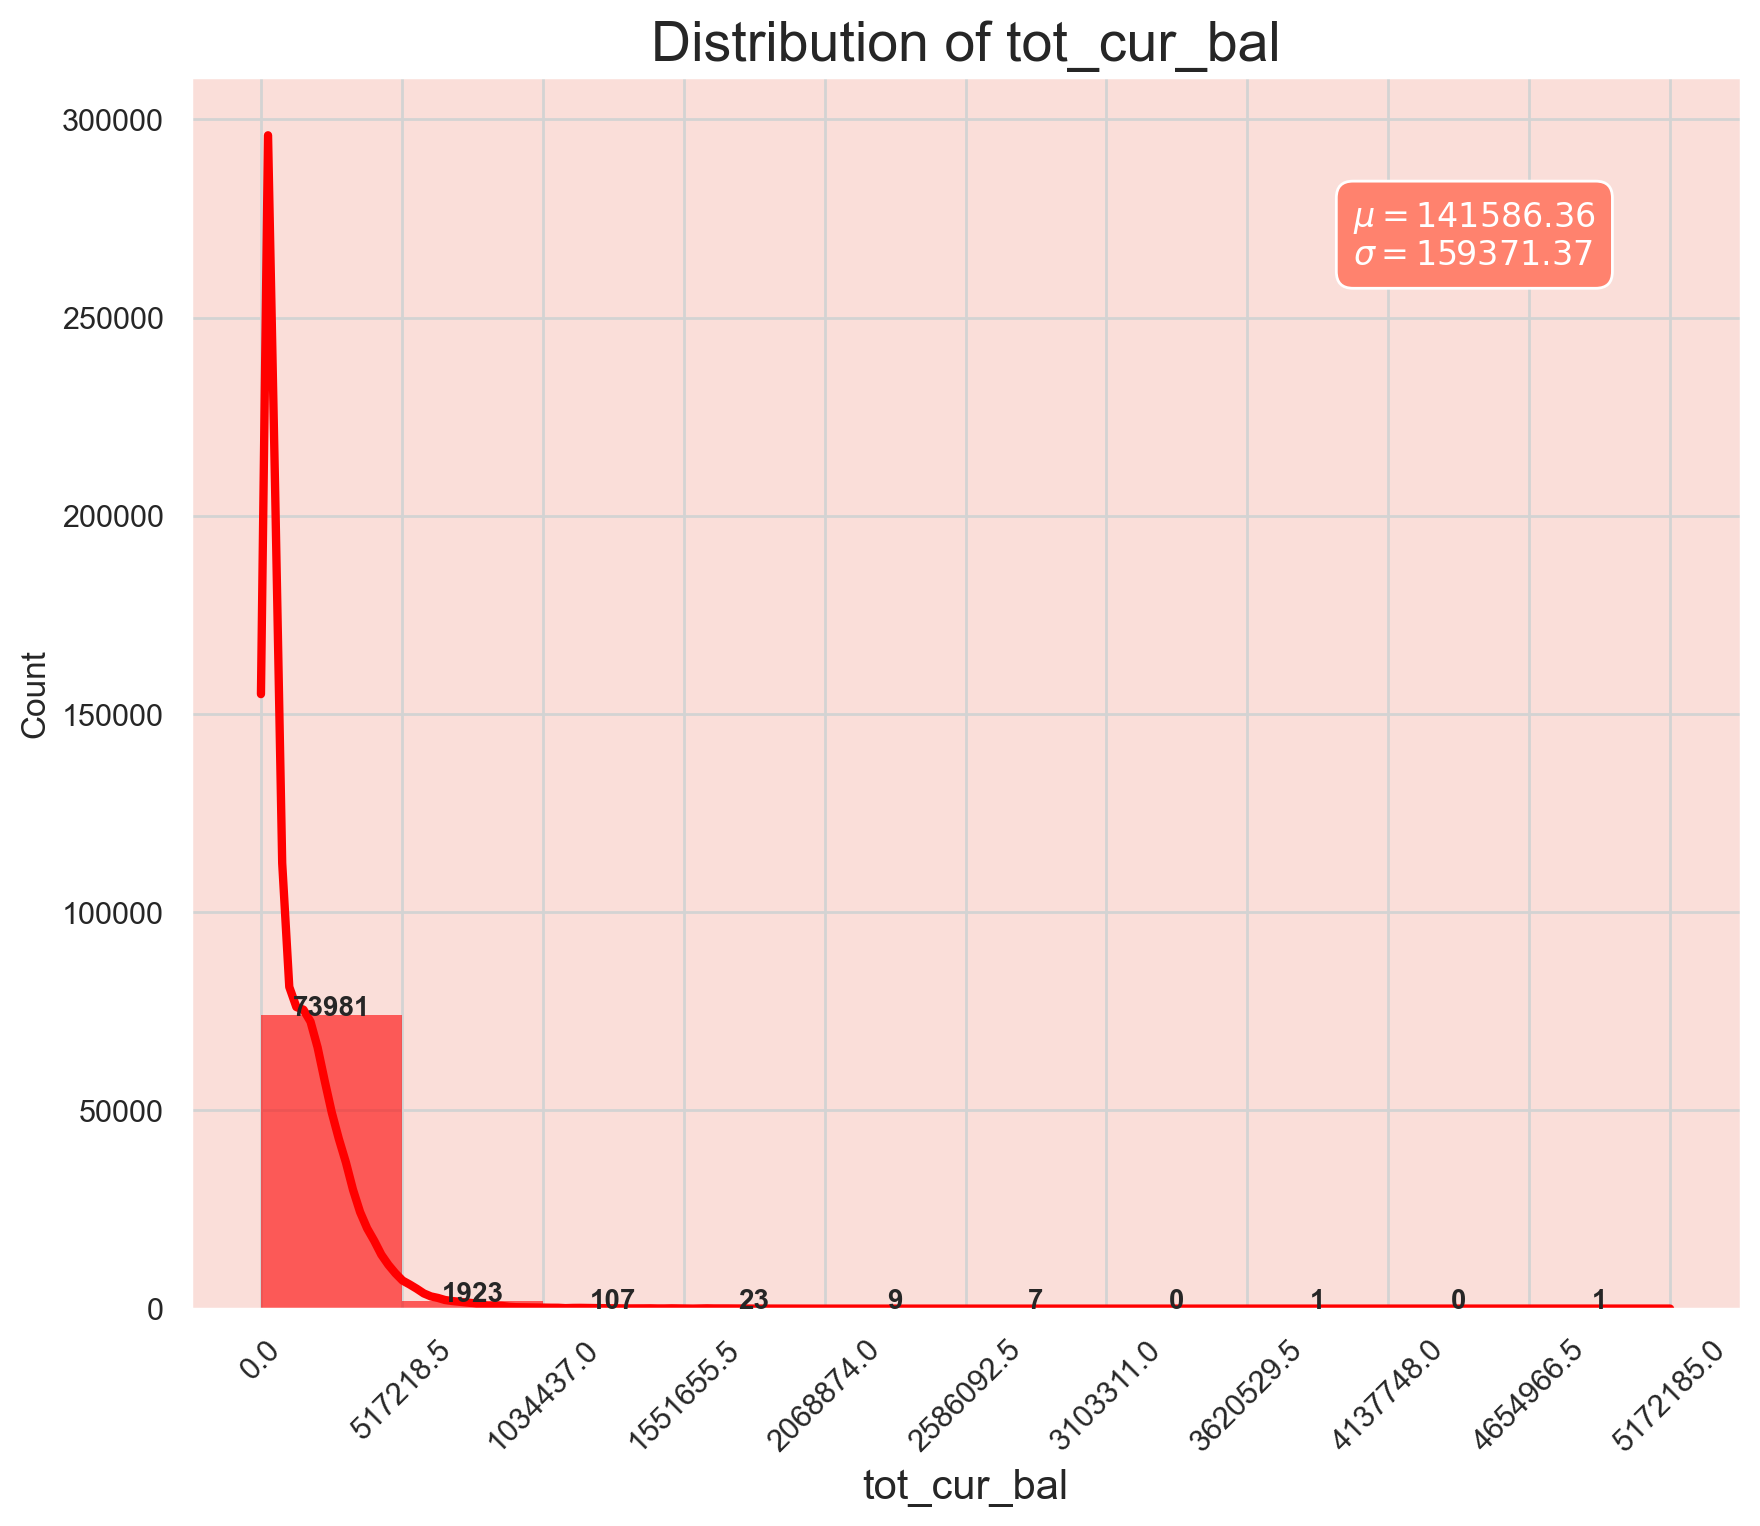

In [59]:
col = 'tot_cur_bal'

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the histogram
values, bin_edges = np.histogram(train_df[col], 
                                 range=(np.floor(train_df[col].min()), np.ceil(train_df[col].max())))
graph = sns.histplot(data=train_df, x=col, bins=bin_edges, kde=True, ax=ax,
                     edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
ax.set_xlabel(col, fontsize=15)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(np.round(bin_edges, 1))
ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.grid(color='lightgrey')

# Annotate each bar with its count
for j, p in enumerate(graph.patches):
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', fontsize=10, fontweight="bold")

# Add text box with mean and standard deviation
textstr = '\n'.join((
    r'$\mu=%.2f$' % df_continuous[col].mean(),
    r'$\sigma=%.2f$' % df_continuous[col].std()
))
ax.text(0.75, 0.9, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top',
        color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Set the title
plt.title(f'Distribution of {col}', fontsize=20)

# Show the plot
plt.show()


In [60]:
median_tot_cur_bal = train_df['tot_cur_bal'].median()

In [61]:
# Fill missing values with the calculated median
train_df['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)

In [62]:
median_tot_cur_bal = test_df['tot_cur_bal'].median()
test_df['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)

### mort_acc

<Axes: >

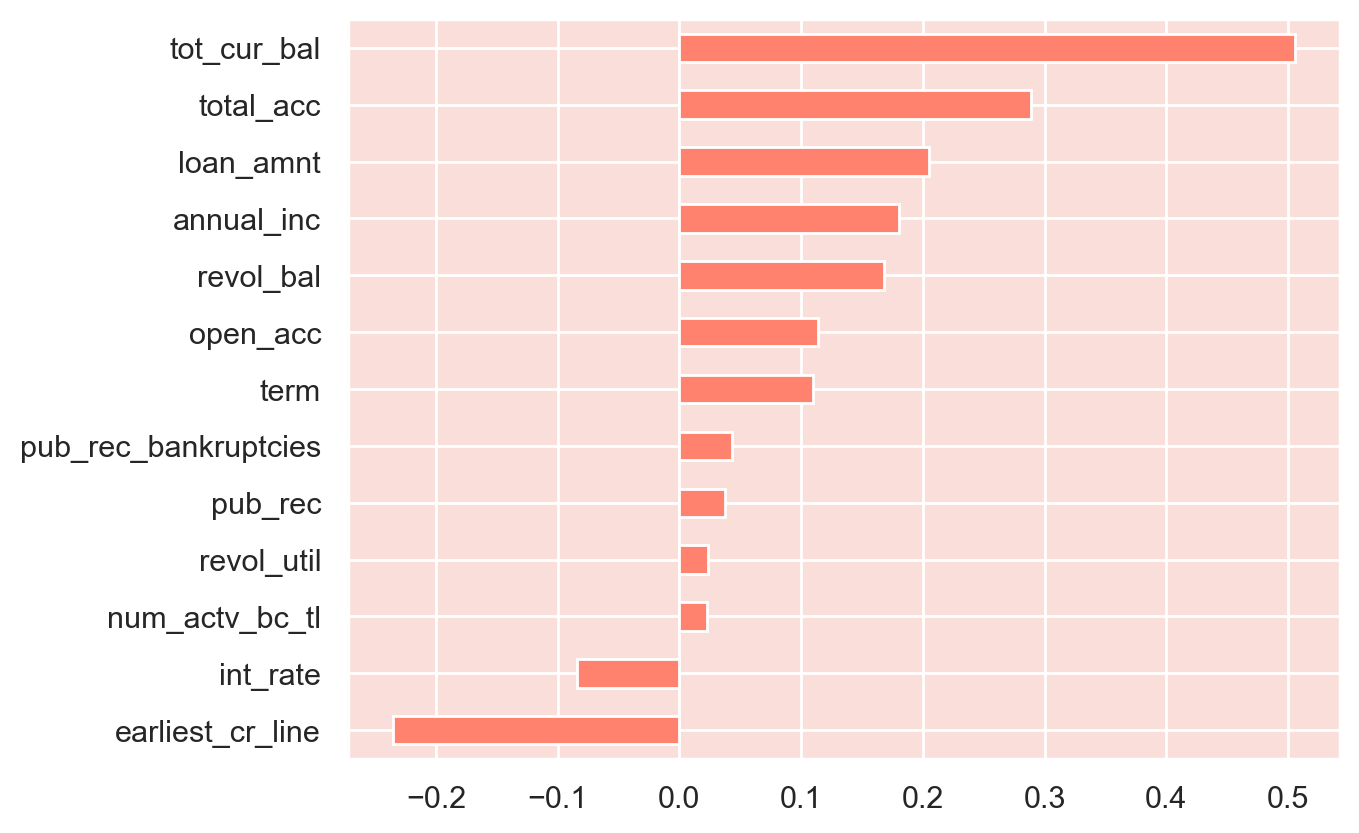

In [63]:
# we will check if this feature is correlated to any other feature in dataset
train_df.corr()['mort_acc'].drop('mort_acc').sort_values().plot.barh()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
<p><b>Feature Engineering Action:</b></p>
<p>Observing the correlation between the <b>tot_cur_bal</b> and <b>mort_acc</b> features, it seems plausible that the number of mortgage accounts (<b>mort_acc</b>) may be related to the total current balance (<b>tot_cur_bal</b>). To address missing values in the <b>mort_acc</b> feature, we will employ the <code>fillna()</code> approach. This involves grouping the dataframe by <b>tot_cur_bal</b> and calculating the mean value for <b>mort_acc</b> per <b>tot_cur_bal</b> entry.</p>
</div>

In [64]:
tot_cur_bal_avg = train_df.groupby(by='tot_cur_bal').mean().mort_acc

In [65]:
def fill_mort_acc(tot_cur_bal, mort_acc):
    if np.isnan(mort_acc):
        return tot_cur_bal_avg[tot_cur_bal].round()
    else:
        return mort_acc

In [66]:
train_df['mort_acc'] = train_df.apply(lambda x: fill_mort_acc(x['tot_cur_bal'], x['mort_acc']), axis=1)

<Axes: >

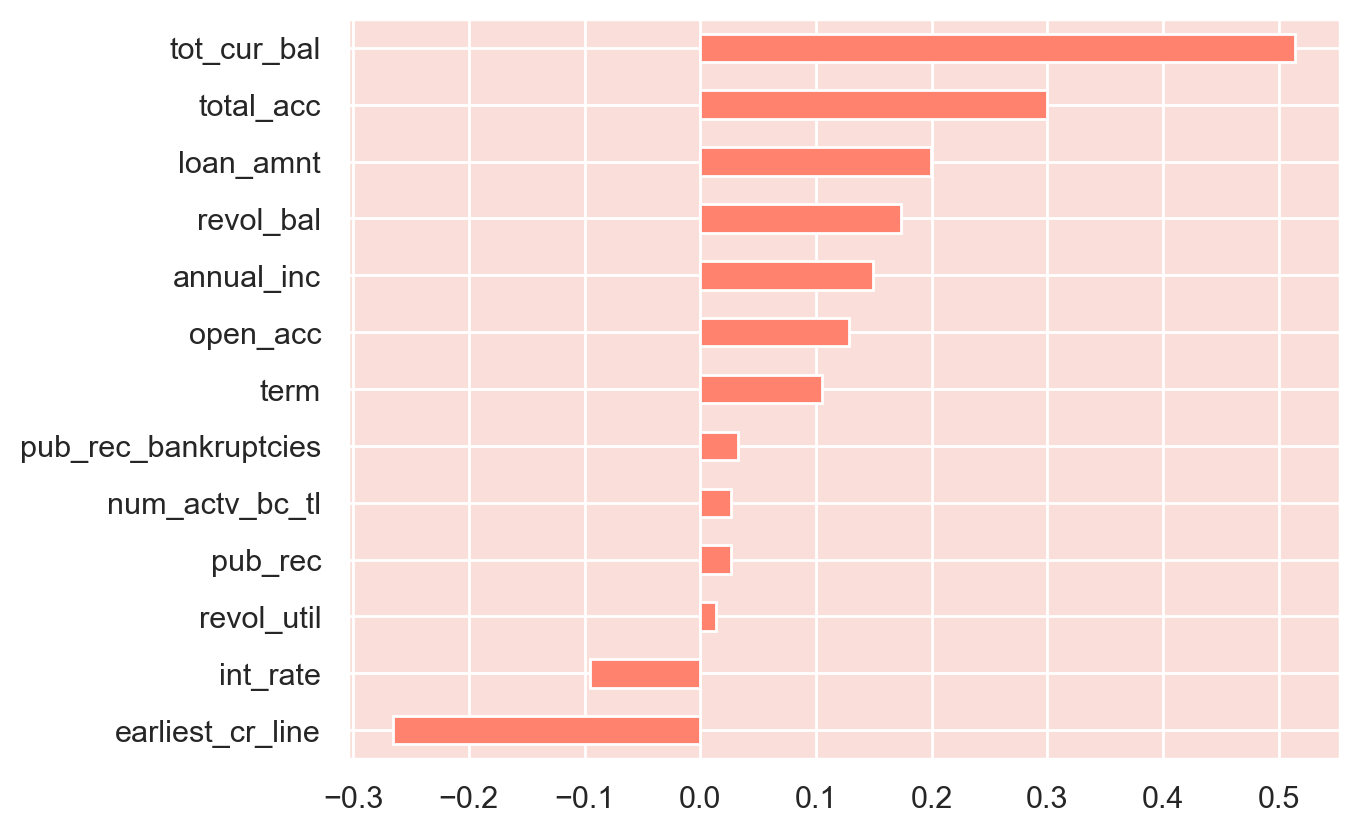

In [67]:
## simialrly doing for test data
test_df.corr()['mort_acc'].drop('mort_acc').sort_values().plot.barh()

In [68]:
tot_cur_bal_avg = test_df.groupby(by='tot_cur_bal').mean().mort_acc
test_df['mort_acc'] = test_df.apply(lambda x: fill_mort_acc(x['tot_cur_bal'], x['mort_acc']), axis=1)

### revol_util and pub_rec_bankruptcies

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <b>Inference:</b><br>
    <p>These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().</p>
</div>


In [69]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

## 5.3: Outlier Treatment
<a id="5.3"></a>
 ⬆️[Table Contents](#table_content)

In [70]:
continuous_features

Index(['annual_inc', 'int_rate', 'loan_amnt', 'tot_cur_bal', 'revol_bal',
       'revol_util'],
      dtype='object')

In [71]:
Q1 = train_df[continuous_features].quantile(0.25)
Q3 = train_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((train_df[continuous_features] < (Q1 - 1.5 * IQR)) | (train_df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

annual_inc     3886
int_rate       1494
loan_amnt       432
tot_cur_bal    3046
revol_bal      4799
revol_util        3
dtype: int64

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <b>Outliers Identification:</b><br>
    <p>Upon identifying outliers for the specified continuous features, we found the following counts of outliers:</p>
    <ul>
        <li><b>annual_inc:</b> 3886 outliers</li>
        <li><b>int_rate:</b> 1494 outliers</li>
        <li><b>loan_amnt:</b> 432 outliers</li>
        <li><b>tot_cur_bal:</b> 3046 outliers</li>
        <li><b>revol_bal:</b> 4799 outliers</li>
        <li><b>revol_util:</b> 3 outliers</li>
    </ul>
</div>


In [72]:
Q1 = train_df[continuous_features].quantile(0.25)
Q3 = train_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
train_outliers_count_specified = (((train_df[continuous_features] < (Q1 - 1.5 * IQR)) | (train_df[continuous_features] > (Q3 + 1.5 * IQR))).sum())/len(train_df)

print("Outlier Ratio's Train Data:\n",train_outliers_count_specified)


Q1 = test_df[continuous_features].quantile(0.25)
Q3 = test_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
test_outliers_count_specified = (((test_df[continuous_features] < (Q1 - 1.5 * IQR)) | (test_df[continuous_features] > (Q3 + 1.5 * IQR))).sum())/len(test_df)

print("\nOutlier Ratio's Test Data:\n",test_outliers_count_specified)


Outlier Ratio's Train Data:
 annual_inc     0.048626
int_rate       0.018695
loan_amnt      0.005406
tot_cur_bal    0.038115
revol_bal      0.060051
revol_util     0.000038
dtype: float64

Outlier Ratio's Test Data:
 annual_inc     0.048708
int_rate       0.017871
loan_amnt      0.005356
tot_cur_bal    0.037795
revol_bal      0.056818
revol_util     0.000050
dtype: float64


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p><strong>Outlier Ratios Comparison:</strong></p>
    <p>Comparing the outlier ratios between the train and test datasets, we can see that they are generally similar for most features. This suggests that the outlier counts are balanced relative to the number of rows in both datasets.</p>
</div>


<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
     <h3>📝 Sensitivity to Outliers:</h3>
<br>
For model evaluations, we are going to use Tree Based Models:<br>
    <b>Decision Trees (DT) and Random Forests (RF)</b>, these tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.<br>
    <b>AdaBoost</b>: This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.
    
<p>To overcome this we'll focus on applying transformations like <b>Box-Cox</b> in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.</p>
</div>


## 5.4: Duplicate Data
<a id="5.4"></a>
 ⬆️[Table Contents](#table_content)

In [73]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

## 5.5: Encode Categorical Variables
<a id="5.5"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p><strong>Categorization of Features for Encoding:</strong></p>
    <p>After analyzing the dataset, we can categorize the features into three groups:</p>
    <ol>
        <li><strong>No Encoding Needed:</strong> These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.</li>
        <li><strong>One-Hot Encoding:</strong> This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.</li>
        <li><strong>Label Encoding:</strong> This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.</li>
    </ol>
    <p>By categorizing the features into these groups, we can apply the appropriate encoding method to each feature, preparing the dataset for modeling.</p>
</div>


In [74]:
train_df.dtypes

annual_inc               float64
earliest_cr_line           int64
grade                     object
home_ownership            object
application_type          object
initial_list_status       object
int_rate                 float64
loan_amnt                  int64
num_actv_bc_tl           float64
mort_acc                 float64
tot_cur_bal              float64
open_acc                 float64
pub_rec                    int64
pub_rec_bankruptcies     float64
revol_bal                  int64
revol_util               float64
term                       int64
total_acc                float64
verification_status       object
loan_status               object
region                    object
fico_score_category     category
purpose_category          object
dtype: object

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h3>No Encoding Needed:</h3>
    <ul>
        <li>annual_inc</li>
        <li>earliest_cr_line</li>
        <li>int_rate</li>
        <li>loan_amnt</li>
        <li>num_actv_bc_tl</li>
        <li>mort_acc</li>
        <li>tot_cur_bal</li>
        <li>open_acc</li>
        <li>pub_rec</li>
        <li>pub_rec_bankruptcies</li>
        <li>revol_bal</li>
        <li>revol_util</li>
        <li>term</li>
        <li>total_acc</li>
     </ul>
    <h3>One-Hot Encoding:</h3>
    <ul>
        <li>home_ownership</li>
        <li>application_type</li>
        <li>initial_list_status</li>
        <li>verification_status</li>
        <li>region</li>
        <li>purpose_category</li>
     </ul>
    <h3>Label Encoding:</h3>
    <ul>
        <li>loan_status</li>
        <li>grade</li>
        <li>fico_score_category</li>
     </ul>    
</div>     
          

### One-Hot-Encoding

In [75]:
one_hot_cols = ['home_ownership','application_type','initial_list_status','verification_status','region','purpose_category']

In [76]:
train_df = pd.get_dummies(train_df, columns=one_hot_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=one_hot_cols, drop_first=True)

In [77]:
train_df['grade'].unique()

array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)

### Label-Encoding

In [78]:
# Define the encoding dictionary
grade_encoding = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

# Map the encoding to the 'grade' column
train_df['grade_encoded'] = train_df['grade'].map(grade_encoding)
train_df.drop(columns=['grade'], inplace=True)

test_df['grade_encoded'] = test_df['grade'].map(grade_encoding)
test_df.drop(columns=['grade'], inplace=True)

In [79]:
# Define the encoding dictionary
fico_encoding = {'Exceptional': 5, 'Very Good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}

# Map the encoding to the 'grade' column
train_df['fico_score_category_enc'] = train_df['fico_score_category'].map(fico_encoding)
train_df.drop(columns=['fico_score_category'], inplace=True)

test_df['fico_score_category_enc'] = test_df['fico_score_category'].map(fico_encoding)
test_df.drop(columns=['fico_score_category'], inplace=True)

In [80]:
train_df['fico_score_category_enc'] = train_df['fico_score_category_enc'].astype(int)
test_df['fico_score_category_enc'] = test_df['fico_score_category_enc'].astype(int)

## Loan Status Encoding | 1: Defaulted, 0: Paid

In [81]:
# Target Feature encoding
target_encoded = {'Paid': 0, 'Defaulted': 1}
train_df['loan_status'] = train_df['loan_status'].map(target_encoded)

In [82]:
train_df['loan_status'].value_counts()

0    63963
1    15953
Name: loan_status, dtype: int64

## 5.6: Check Imbalanced Data
<a id="5.6"></a>
 ⬆️[Table Contents](#table_content)

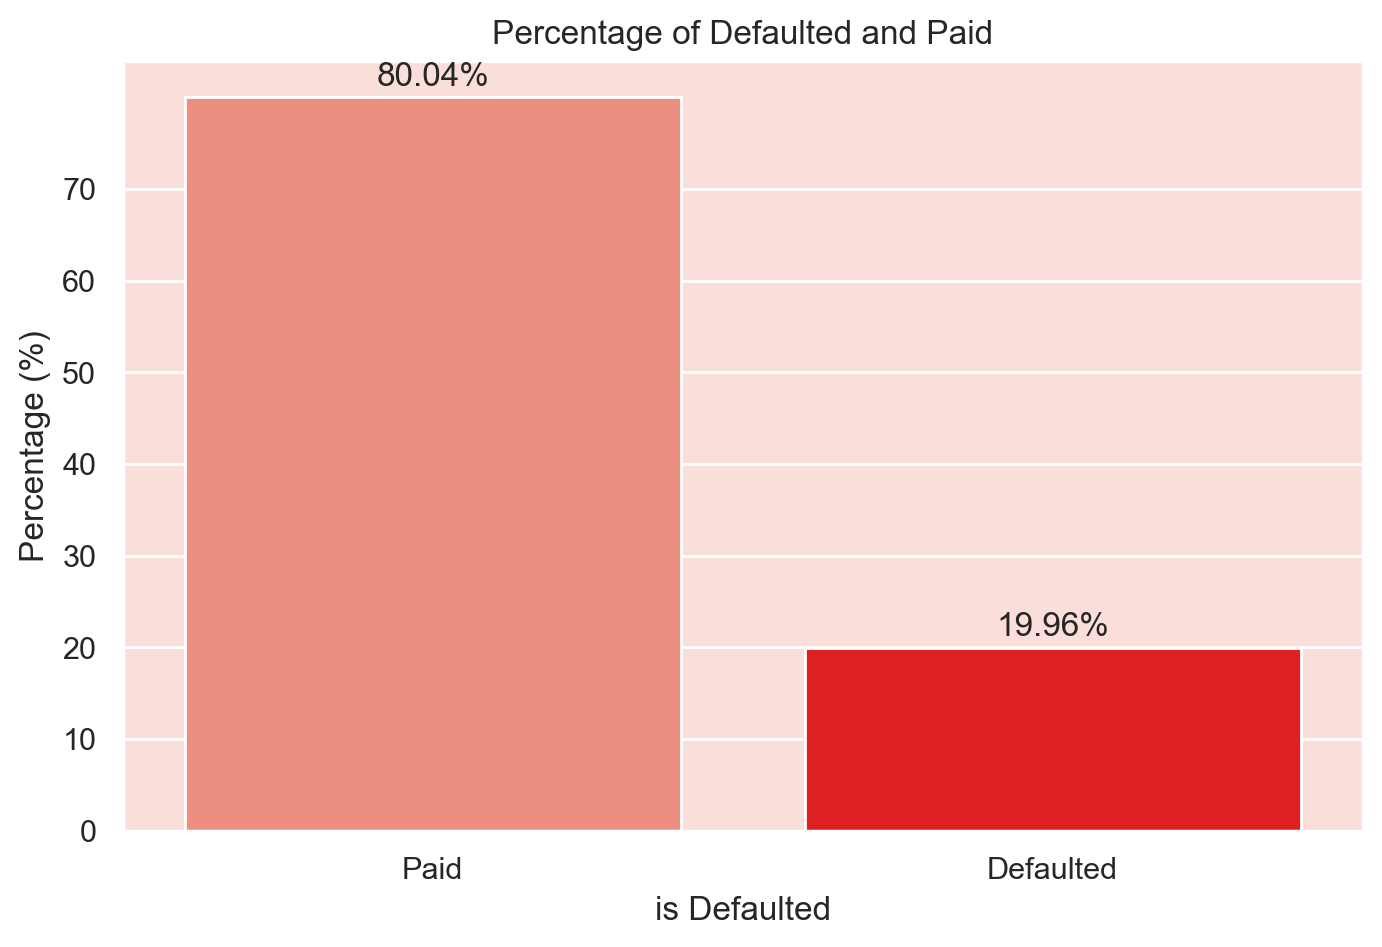

In [83]:
# Calculating the percentage of each class
percentage = train_df['loan_status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#ff826e', 'red'])
plt.title('Percentage of Defaulted and Paid')
plt.xlabel('is Defaulted')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Paid','Defaulted'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    The bar plot shows the percentage of defaulted and paid in the dataset. Approximately 80.04% of the loan status was paid, and 19.96% were defaulted. This indicates that there is high imbalance in the target variable.
    To address this, we will use <b>SMOTE (Synthetic Minority Over-sampling Technique)</b>. SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.
</div>

### 5.6.1: Handling Unbalanced
<a id="5.6.1"></a>
 ⬆️[Table Contents](#table_content)

In [84]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(train_df.drop('loan_status', axis=1), train_df['loan_status'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

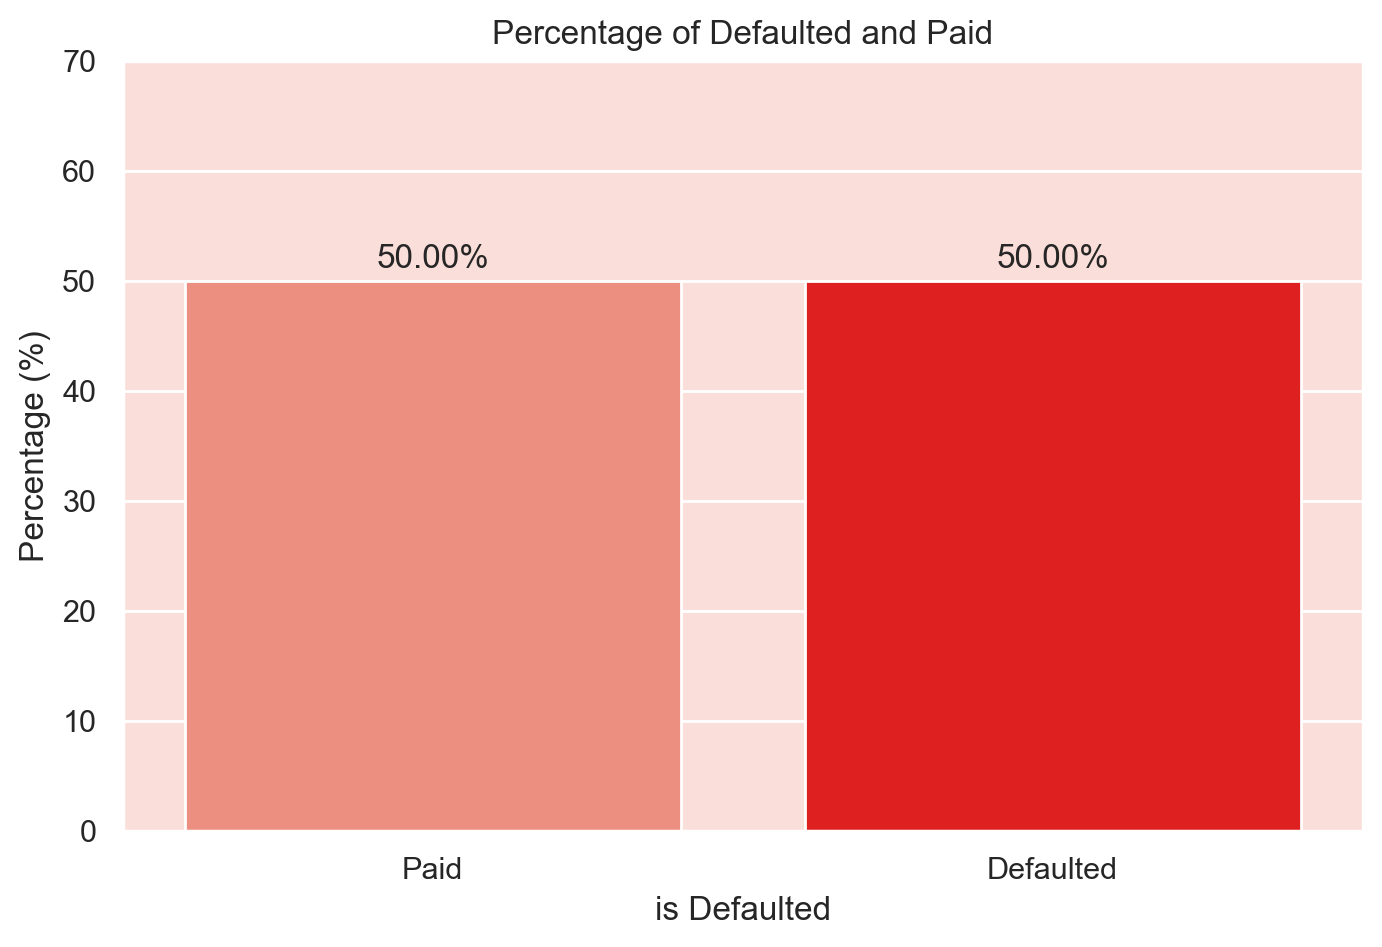

In [85]:
# Calculating the percentage of each class
percentage = oversampled['loan_status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#ff826e', 'red'])
plt.title('Percentage of Defaulted and Paid')
plt.xlabel('is Defaulted')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Paid','Defaulted'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

# 6: Business Requirement
<a id="6"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #FFCCCC; padding: 10px 12px; border-radius: 10px;border: 2px solid #cc0000;">
    <h2>📝 Note:</h2>
    In the context of loan default prediction:<br>
    <ul>
    <li><b>Prioritize High Recall (Sensitivity) for Defaulted Loans</b>: Emphasize identifying most of the actual defaulted loans correctly, even if it leads to some false positives (paid loans being misclassified as defaulted). It's crucial to capture as many true defaulted cases as possible to mitigate financial risks and take necessary actions.</li>
    <li><b>Minimize False Negatives (FN)</b>: Aim to reduce instances where defaulted loans are missed by the model. Missing defaulted cases could result in financial losses and impact the overall portfolio performance.</li>
    <li><b>Balance Precision and Recall (F1-score)</b>: While minimizing false positives is important to avoid unnecessary interventions or restrictions on credit access, prioritize achieving high recall to ensure defaulted loans are not overlooked by the model.<b>the F1-score for the 'defaulted' class (1) would be the most important metric for evaluating models in this project</b>.</li>
    </ul><br>
    By focusing on these aspects, the loan default prediction model can effectively identify loans at risk of default, enabling proactive measures to mitigate potential losses and maintain a healthy loan portfolio.<br>
</div>


# 7: Spliting Training Dataset 
<a id="7"></a>
 ⬆️[Table Contents](#table_content)

In [86]:
X = oversampled.drop(['loan_status'], axis=1)
y = oversampled['loan_status']

In [87]:
# Split the labeled training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 8: Decision Tree Model Building
<a id="8"></a>
 ⬆️[Table Contents](#table_content)

## 8.1: DT Base Model Definition
<a id="8.1"></a>
 ⬆️[Table Contents](#table_content)

In [88]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

## 8.2: DT Hyperparameter Tuning
<a id="8.2"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
I will create a function to identify the best set of hyperparameters that maximize the F1-score for class 1 (defaulted). This method provides a reusable framework for <b>hyperparameter tuning</b> for other models as well,It uses <b>GridSearchCV and cross-validation (StratifiedKFold)</b> to evaluate different combinations of hyperparameters. 
</div>

In [89]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (defaulted) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [90]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [23, 24, 25, 26, 27],
    'min_samples_split': [2, 3, 4, 5],  
    'min_samples_leaf': [1, 2, 3, 4], 
  
    
    # we want to optimize for class 1, we have included the class_weight parameter in our grid.
    # In the grid above, the weight for class 0 is always 1, while the weight for class 1 varies from 1 to 5.
    # This will help the model to focus more on class 1.
}


In [91]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [92]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2}


## 8.3: DT Model Evaluation
<a id="8.3"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">To streamline the evaluation of different models, we will define a set of functions that compute key performance metrics. This approach will ensure consistency in how we assess each model and facilitate comparisons between them</div>



In [93]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [94]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for validation test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     51003
           1       0.98      0.95      0.97     51337

    accuracy                           0.97    102340
   macro avg       0.97      0.97      0.97    102340
weighted avg       0.97      0.97      0.97    102340


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     12960
           1       0.79      0.77      0.78     12626

    accuracy                           0.79     25586
   macro avg       0.79      0.79      0.79     25586
weighted avg       0.79      0.79      0.79     25586



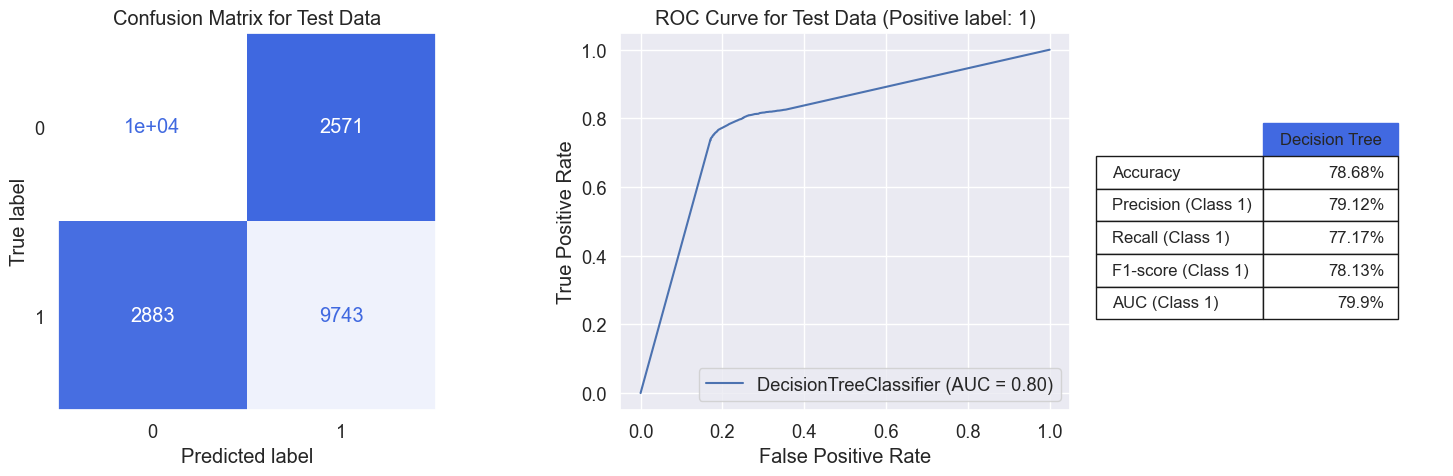

In [95]:
model_evaluation(best_dt, X_train, X_val, y_train, y_val, 'Decision Tree')

In [96]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_val, y_val, 'Decision Tree')
dt_result

Decision Tree
Accuracy                   78.68%
Precision (Class 1)        79.12%
Recall (Class 1)           77.17%
F1-score (Class 1)         78.13%
AUC (Class 1)               79.9%

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h3>Decision Tree Model Evaluation (Loan Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>78.68%</td>
            <td>The model correctly predicted loan statuses for 78.68% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>79.12%</td>
            <td>Out of all loans predicted as defaulted, only 79.12% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>77.17%</td>
            <td>The model identified 38% of the actual defaulted loans.</td>
        </tr>
        <tr>
            <td>F1-score (Defaulted)</td>
            <td>78.13%</td>
            <td>The harmonic mean of precision and recall for defaulted loans is 78.13%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>79.9%</td>
            <td>The Area Under the ROC Curve (AUC) for defaulted loans is 80%, indicating the model's ability to rank defaulted loans higher than non-defaulted ones.</td>
        </tr>
    </table>
    <p>The evaluation of the Decision Tree model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 78.68%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases. The AUC score further validates the model's discriminative power in distinguishing defaulted loans from paid ones.</p>

</div>


## 8.4: Target Prediction for Test Data
<a id="8.4"></a>
 ⬆️[Table Contents](#table_content)

In [97]:
y_test_pred = best_dt.predict(test_df)

In [98]:
# Create a DataFrame from y_test_pred with column name "predicted_loan_status"
predictions_df = pd.DataFrame(data=y_test_pred, columns=["predicted_loan_status"])

DT_result_df = pd.concat([test_df.reset_index(drop=True), predictions_df], axis=1)

In [99]:
DT_result_df.head()

annual_inc  earliest_cr_line  int_rate  loan_amnt  num_actv_bc_tl  \
0     50000.0              2012     13.99     5000.0             1.0   
1     92000.0              2001     10.99    30000.0             2.0   
2     89000.0              1989     10.15    16000.0             5.0   
3     33000.0              2004     13.68    10000.0             6.0   
4     35580.0              1997     14.09     4000.0             2.0   

   mort_acc  tot_cur_bal  open_acc  pub_rec  pub_rec_bankruptcies  revol_bal  \
0       0.0      33395.0       9.0        0                   0.0     2568.0   
1       1.0     229832.0      11.0        0                   0.0    30394.0   
2       1.0     181616.0      15.0        0                   0.0    38400.0   
3       0.0      30603.0      12.0        1                   1.0    21224.0   
4       1.0     124597.0       8.0        0                   0.0     3471.0   

   revol_util  term  total_acc  ...  application_type_Joint App  \
0         9.8    36       11.0  ...                           0   
1        75.4    36       35.0  ...                           0   
2        75.3    60       41.0  ...                           0   
3        69.4    36       16.0  ...                           0   
4        39.4    36       19.0  ...                           0   

   initial_list_status_w  verification_status_Source Verified  \
0                      0                                    1   
1                      0                                    1   
2                      1                                    0   
3                      0                                    0   
4                      0                                    0   

   verification_status_Verified  region_Northeast  region_South  region_West  \
0                             0                 0             0            0   
1                             0                 0             0            1   
2                             0                 0             1            0   
3                             0                 0             0            1   
4                             1                 0             0            0   

   purpose_category_credit_related  purpose_category_education_and_personal  \
0                                1                                        0   
1                                1                                        0   
2                                1                                        0   
3                                1                                        0   
4                                1                                        0   

   purpose_category_other  purpose_category_specific_purpose  grade_encoded  \
0                       0                                  0              5   
1                       0                                  0              6   
2                       0                                  0              6   
3                       0                                  0              5   
4                       0                                  0              6   

   fico_score_category_enc  predicted_loan_status  
0                        3                      0  
1                        3                      0  
2                        3                      0  
3                        3                      0  
4                        3                      0  

[5 rows x 31 columns]

# 9: Random Forest Model Building
<a id="9"></a>
 ⬆️[Table Contents](#table_content)

## 9.1:  RF Base Model Definition
<a id="9.1"></a>
 ⬆️[Table Contents](#table_content)

In [104]:
# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

## 9.2: RF Hyperparameter Tuning
<a id="9.2"></a>
 ⬆️[Table Contents](#table_content)

In [105]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

In [106]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

In [107]:
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


## 9.3: RF Model Evaluation
<a id="9.3"></a>
 ⬆️[Table Contents](#table_content)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     51003
           1       0.98      0.92      0.95     51337

    accuracy                           0.95    102340
   macro avg       0.95      0.95      0.95    102340
weighted avg       0.95      0.95      0.95    102340


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     12960
           1       0.91      0.78      0.84     12626

    accuracy                           0.85     25586
   macro avg       0.86      0.85      0.85     25586
weighted avg       0.86      0.85      0.85     25586



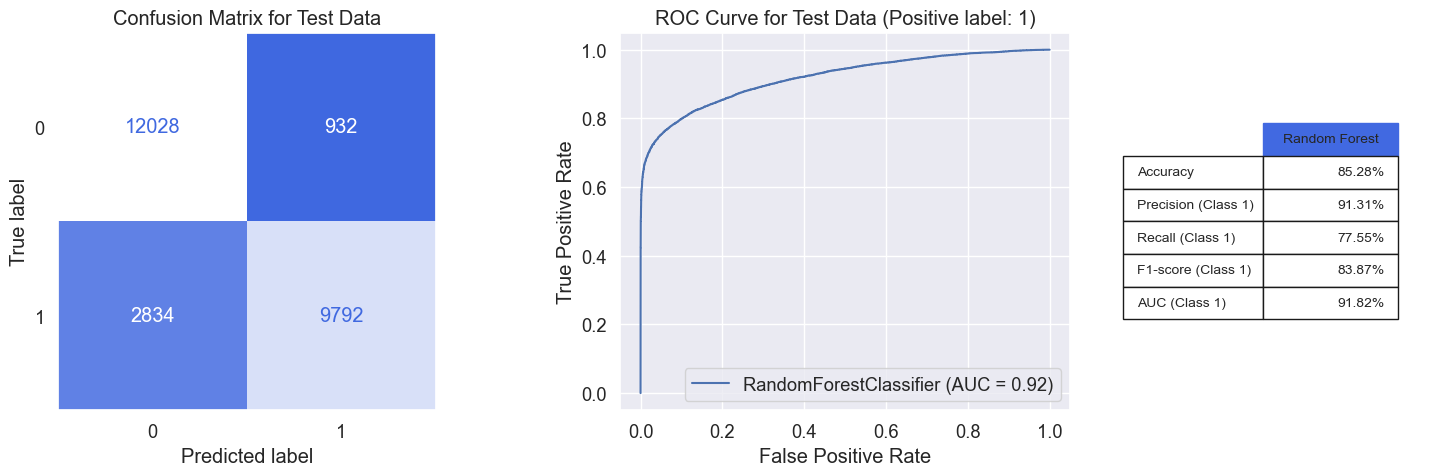

In [108]:
model_evaluation(best_rf, X_train, X_val, y_train, y_val, 'Random Forest')

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h3>RF Model Evaluation (Loan Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>85.28%</td>
            <td>The model correctly predicted loan statuses for 85% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>91.31%</td>
            <td>Out of all loans predicted as defaulted, only 91% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>77.55%</td>
            <td>The model identified 76% of the actual defaulted loans.</td>
        </tr>
        <tr>
            <td>F1-score (Defaulted)</td>
            <td>83.87%</td>
            <td>The harmonic mean of precision and recall for defaulted loans is 84%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>91.82%</td>
            <td>The Area Under the ROC Curve (AUC) for defaulted loans is 92%, indicating the model's ability to rank defaulted loans higher than non-defaulted ones.</td>
        </tr>
    </table>
    <p>The evaluation of the RF model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 85%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases. The AUC score further validates the model's discriminative power in distinguishing defaulted loans from paid ones.</p>
</div>


In [109]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(best_rf, X_val, y_val, 'Random Forest')
rf_result

Random Forest
Accuracy                   85.28%
Precision (Class 1)        91.31%
Recall (Class 1)           77.55%
F1-score (Class 1)         83.87%
AUC (Class 1)              91.82%

## 9.4: Target Prediction for Test Data
<a id="9.4"></a>
 ⬆️[Table Contents](#table_content)

In [110]:
y_test_pred = best_rf.predict(test_df)

In [111]:
# Create a DataFrame from y_test_pred with column name "predicted_loan_status"
predictions_df = pd.DataFrame(data=y_test_pred, columns=["predicted_loan_status"])

RF_result_df = pd.concat([test_df.reset_index(drop=True), predictions_df], axis=1)

In [112]:
RF_result_df.head()

annual_inc  earliest_cr_line  int_rate  loan_amnt  num_actv_bc_tl  \
0     50000.0              2012     13.99     5000.0             1.0   
1     92000.0              2001     10.99    30000.0             2.0   
2     89000.0              1989     10.15    16000.0             5.0   
3     33000.0              2004     13.68    10000.0             6.0   
4     35580.0              1997     14.09     4000.0             2.0   

   mort_acc  tot_cur_bal  open_acc  pub_rec  pub_rec_bankruptcies  revol_bal  \
0       0.0      33395.0       9.0        0                   0.0     2568.0   
1       1.0     229832.0      11.0        0                   0.0    30394.0   
2       1.0     181616.0      15.0        0                   0.0    38400.0   
3       0.0      30603.0      12.0        1                   1.0    21224.0   
4       1.0     124597.0       8.0        0                   0.0     3471.0   

   revol_util  term  total_acc  ...  application_type_Joint App  \
0         9.8    36       11.0  ...                           0   
1        75.4    36       35.0  ...                           0   
2        75.3    60       41.0  ...                           0   
3        69.4    36       16.0  ...                           0   
4        39.4    36       19.0  ...                           0   

   initial_list_status_w  verification_status_Source Verified  \
0                      0                                    1   
1                      0                                    1   
2                      1                                    0   
3                      0                                    0   
4                      0                                    0   

   verification_status_Verified  region_Northeast  region_South  region_West  \
0                             0                 0             0            0   
1                             0                 0             0            1   
2                             0                 0             1            0   
3                             0                 0             0            1   
4                             1                 0             0            0   

   purpose_category_credit_related  purpose_category_education_and_personal  \
0                                1                                        0   
1                                1                                        0   
2                                1                                        0   
3                                1                                        0   
4                                1                                        0   

   purpose_category_other  purpose_category_specific_purpose  grade_encoded  \
0                       0                                  0              5   
1                       0                                  0              6   
2                       0                                  0              6   
3                       0                                  0              5   
4                       0                                  0              6   

   fico_score_category_enc  predicted_loan_status  
0                        3                      0  
1                        3                      0  
2                        3                      0  
3                        3                      0  
4                        3                      0  

[5 rows x 31 columns]

# 10: XGBoost Model Building
<a id="10"></a>
 ⬆️[Table Contents](#table_content)

## 10.1: XGBoost Base Model Definition
<a id="10.1"></a>

In [113]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

## 10:2: Outlier treating using Box-cox
<a id="10.2"></a>
 ⬆️[Table Contents](#table_content)

In [114]:
from scipy.stats import boxcox

In [115]:
continuous_features

Index(['annual_inc', 'int_rate', 'loan_amnt', 'tot_cur_bal', 'revol_bal',
       'revol_util'],
      dtype='object')

In [116]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['annual_inc'] = X_train['annual_inc'] + 0.001
X_val['annual_inc'] = X_val['annual_inc'] + 0.001
test_df['annual_inc'] = test_df['annual_inc'] + 0.001

X_train['tot_cur_bal'] = X_train['tot_cur_bal'] + 0.001
X_val['tot_cur_bal'] = X_val['tot_cur_bal'] + 0.001
test_df['tot_cur_bal'] = test_df['tot_cur_bal'] + 0.001

X_train['revol_bal'] = X_train['revol_bal'] + 0.001
X_val['revol_bal'] = X_val['revol_bal'] + 0.001
test_df['revol_bal'] = test_df['revol_bal'] + 0.001

X_train['revol_util'] = X_train['revol_util'] + 0.001
X_val['revol_util'] = X_val['revol_util'] + 0.001
test_df['revol_util'] = test_df['revol_util'] + 0.001

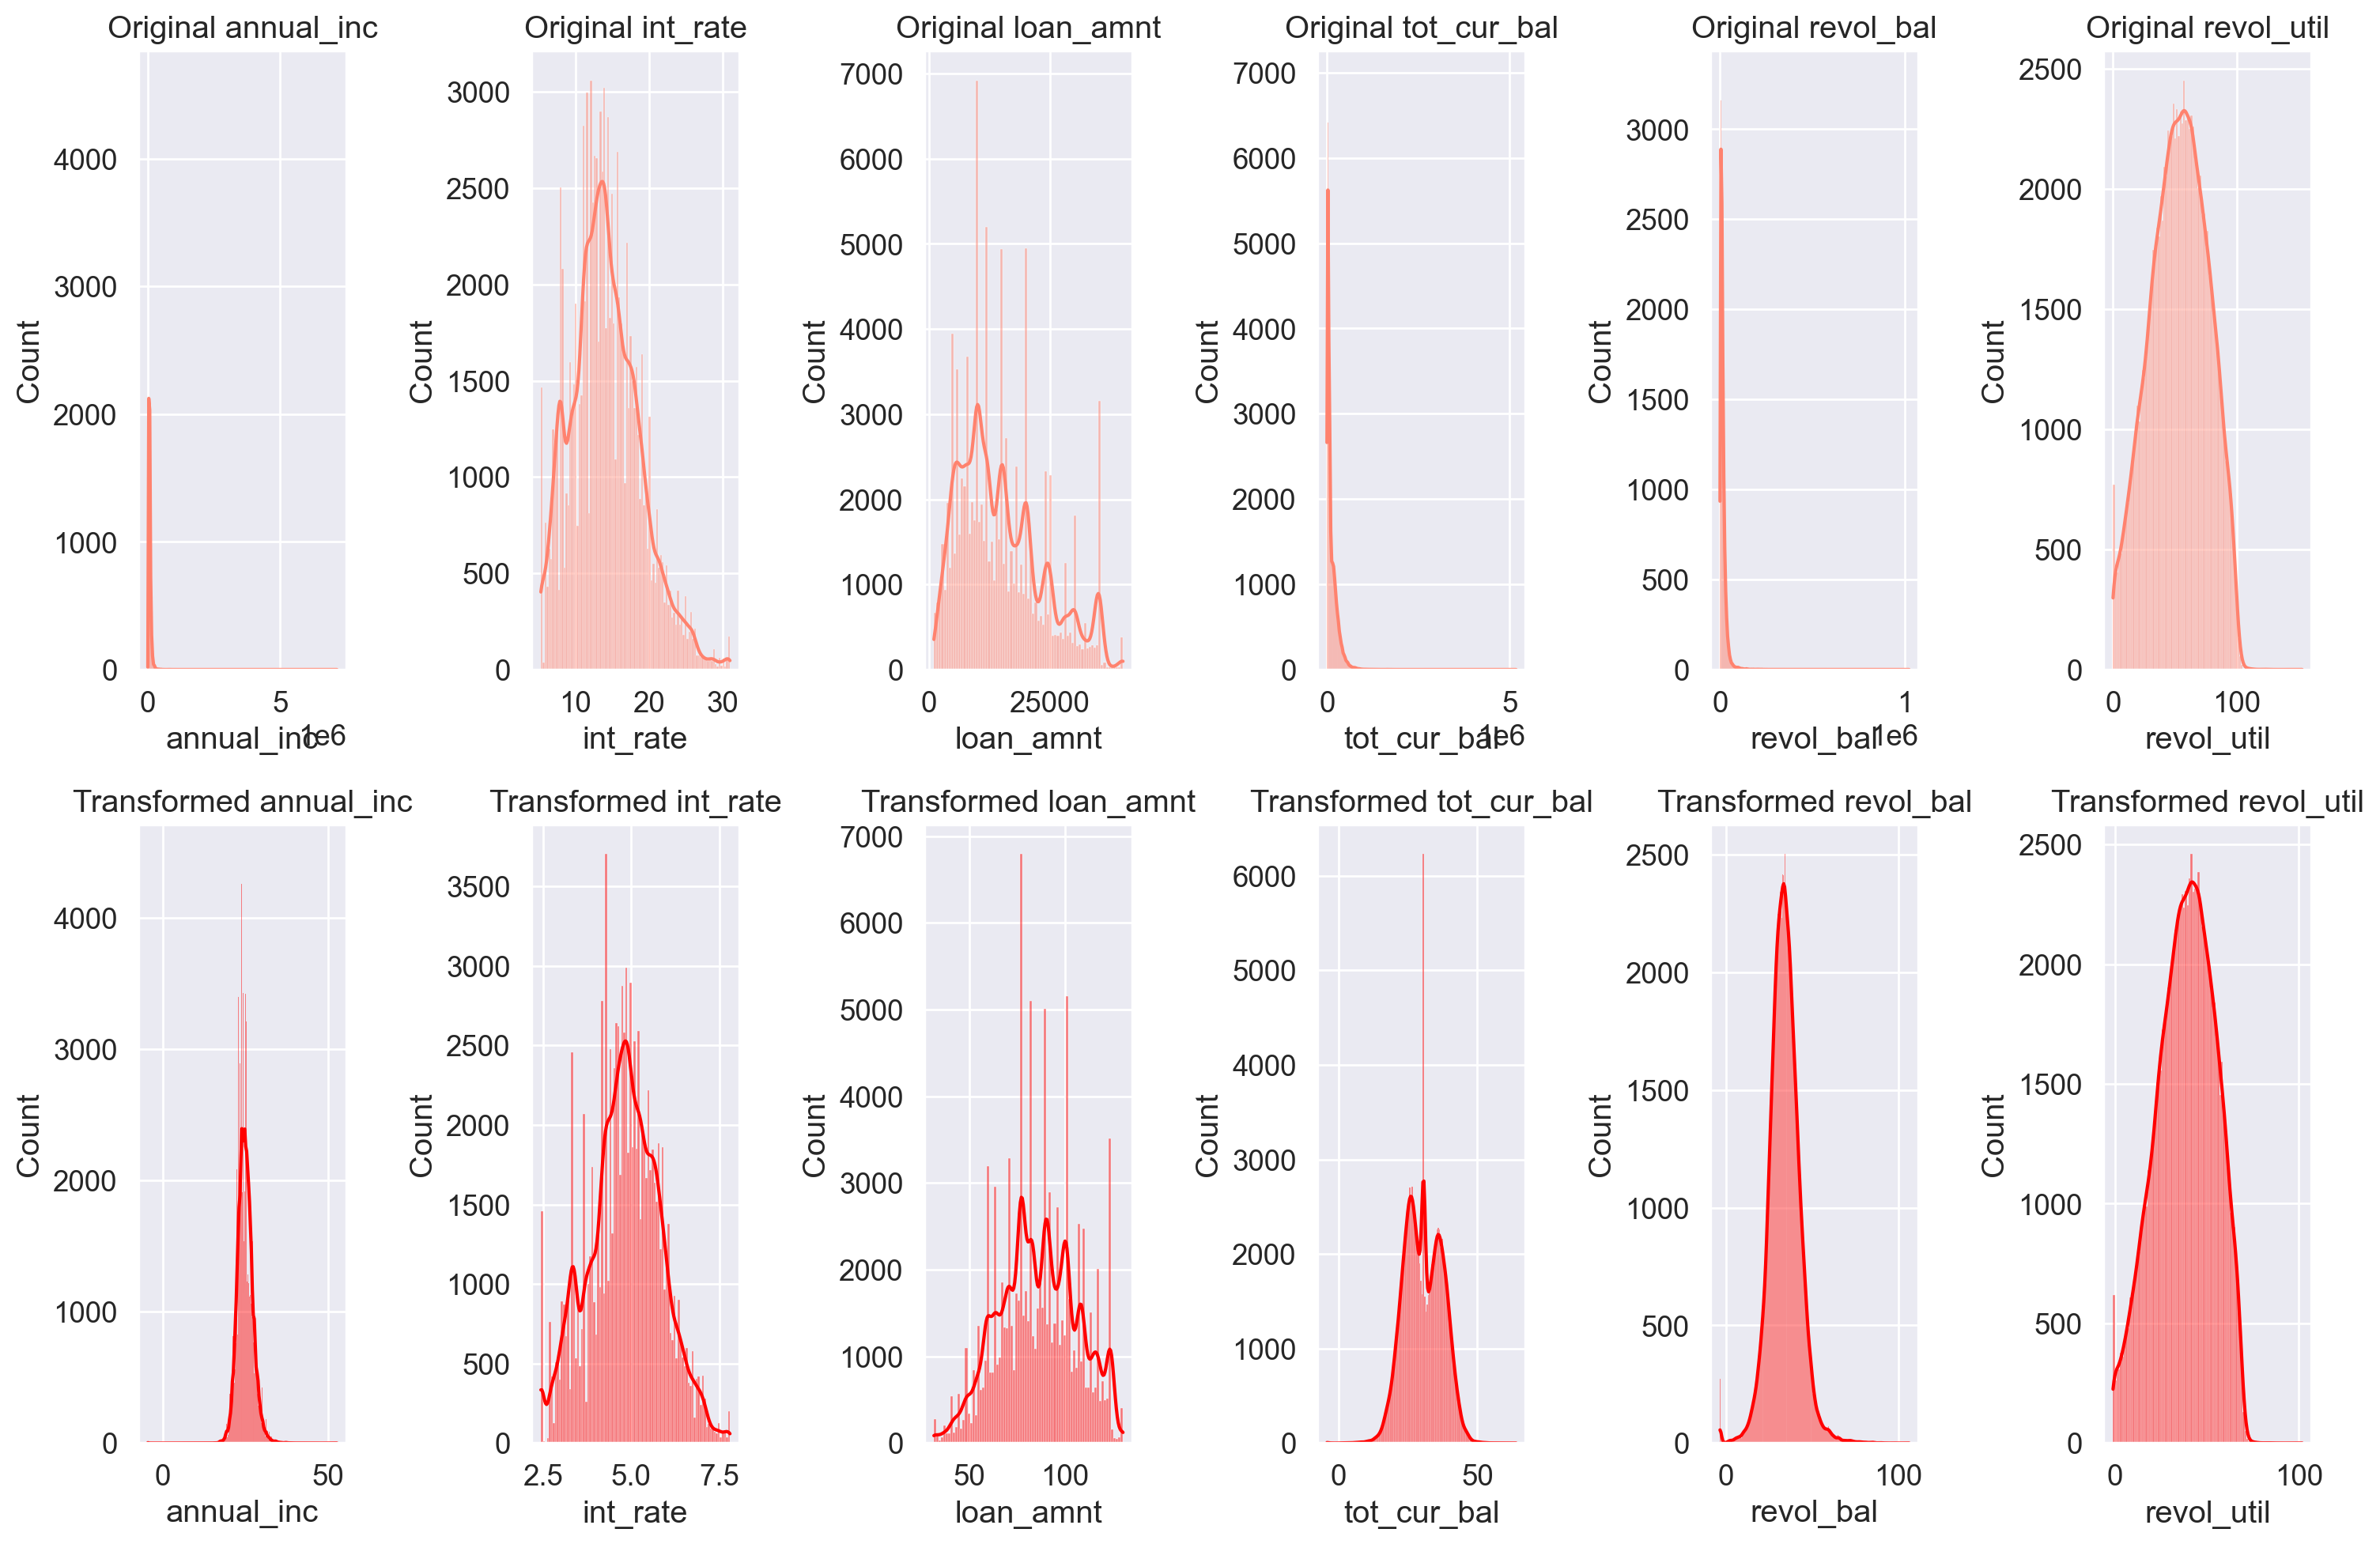

In [117]:
fig, ax = plt.subplots(2, 6, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        test_df[col] = boxcox(test_df[col], lmbda=lambdas[col])
        X_val[col] = boxcox(X_val[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

## 10.3:  XGBoost Hyperparameter Tuning
<a id="10.3"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">Due to the large number of XGBoost hyperparameters, the process of finding optimal hyperparameters will be very time-consuming. For this reason, we made the set of grid values smaller and finally we got the following optimal combination of hyperparameters for our XGBoost classifier:</div>

In [118]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_opt = XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# Train the XGBoost classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

## 10.4: XGBoost Model Evaluation
<a id="10.4"></a>
 ⬆️[Table Contents](#table_content)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     51003
           1       0.99      0.74      0.85     51337

    accuracy                           0.86    102340
   macro avg       0.89      0.86      0.86    102340
weighted avg       0.89      0.86      0.86    102340


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     12960
           1       0.98      0.73      0.84     12626

    accuracy                           0.86     25586
   macro avg       0.89      0.86      0.86     25586
weighted avg       0.89      0.86      0.86     25586



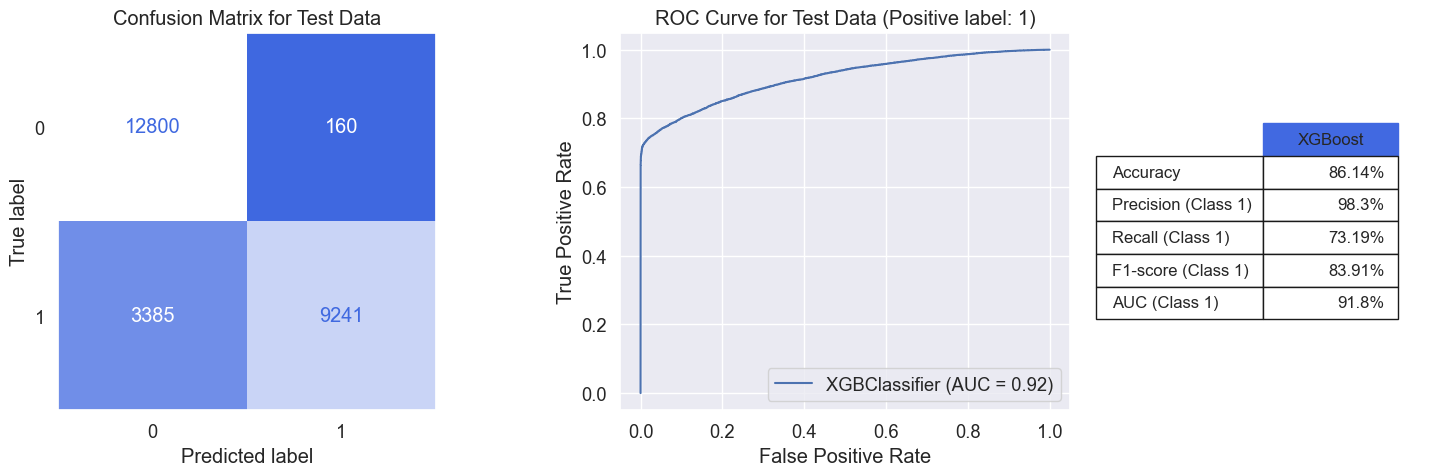

In [120]:
model_evaluation(xgb_opt, X_train, X_val, y_train, y_val, 'XGBoost')

In [122]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_opt, X_val, y_val, 'XGBoost')
xgb_result

XGBoost
Accuracy             86.14%
Precision (Class 1)   98.3%
Recall (Class 1)     73.19%
F1-score (Class 1)   83.91%
AUC (Class 1)         91.8%

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h3>XGBoost Model Evaluation (Loan Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>86.14%</td>
            <td>The model correctly predicted loan statuses for 86% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>98.3%</td>
            <td>Out of all loans predicted as defaulted, only 98% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>73.19%</td>
            <td>The model identified 73% of the actual defaulted loans.</td>
        </tr>
        <tr>
            <td>F1-score (Defaulted)</td>
            <td>83.91%</td>
            <td>The harmonic mean of precision and recall for defaulted loans is 84%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>91.8%</td>
            <td>The Area Under the ROC Curve (AUC) for defaulted loans is 92%, indicating the model's ability to rank defaulted loans higher than non-defaulted ones.</td>
        </tr>
    </table>
    <p>The evaluation of the XGBoost model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 86%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases,however compared to other models, XGBoost can be good model as it has 92% of Recall. The AUC score further validates the model's discriminative power in distinguishing defaulted loans from paid ones.</p>
</div>


## 10.5: Target Prediction for Test Data
<a id="10.5"></a>
 ⬆️[Table Contents](#table_content)

In [124]:
y_test_pred = xgb_opt.predict(test_df)

In [125]:
# Create a DataFrame from y_test_pred with column name "predicted_loan_status"
predictions_df = pd.DataFrame(data=y_test_pred, columns=["predicted_loan_status"])

XG_result_df = pd.concat([test_df.reset_index(drop=True), predictions_df], axis=1)

In [126]:
XG_result_df.head()

annual_inc  earliest_cr_line  int_rate   loan_amnt  num_actv_bc_tl  \
0   23.883190              2012  4.882877   59.321170             1.0   
1   26.505820              2001  4.175401  117.019076             2.0   
2   26.357777              1989  3.957849   92.352448             5.0   
3   22.212451              2004  4.814081   77.290960             6.0   
4   22.508416              1997  4.904883   54.443165             2.0   

   mort_acc  tot_cur_bal  open_acc  pub_rec  pub_rec_bankruptcies  revol_bal  \
0       0.0    25.855653       9.0        0                   0.0  22.720936   
1       1.0    37.067491      11.0        0                   0.0  44.004628   
2       1.0    35.513545      15.0        0                   0.0  46.735187   
3       0.0    25.422894      12.0        1                   1.0  40.092821   
4       1.0    33.141233       8.0        0                   0.0  24.703523   

   revol_util  term  total_acc  ...  application_type_Joint App  \
0    7.567152    36       11.0  ...                           0   
1   53.427798    36       35.0  ...                           0   
2   53.362629    60       41.0  ...                           0   
3   49.502036    36       16.0  ...                           0   
4   29.281506    36       19.0  ...                           0   

   initial_list_status_w  verification_status_Source Verified  \
0                      0                                    1   
1                      0                                    1   
2                      1                                    0   
3                      0                                    0   
4                      0                                    0   

   verification_status_Verified  region_Northeast  region_South  region_West  \
0                             0                 0             0            0   
1                             0                 0             0            1   
2                             0                 0             1            0   
3                             0                 0             0            1   
4                             1                 0             0            0   

   purpose_category_credit_related  purpose_category_education_and_personal  \
0                                1                                        0   
1                                1                                        0   
2                                1                                        0   
3                                1                                        0   
4                                1                                        0   

   purpose_category_other  purpose_category_specific_purpose  grade_encoded  \
0                       0                                  0              5   
1                       0                                  0              6   
2                       0                                  0              6   
3                       0                                  0              5   
4                       0                                  0              6   

   fico_score_category_enc  predicted_loan_status  
0                        3                      0  
1                        3                      0  
2                        3                      0  
3                        3                      0  
4                        3                      0  

[5 rows x 31 columns]

# 11: Conclusion
<a id="11"></a>
 ⬆️[Table Contents](#table_content)

In [127]:
results = pd.concat([dt_result, rf_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score (class 1) values
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score (Class 1)')

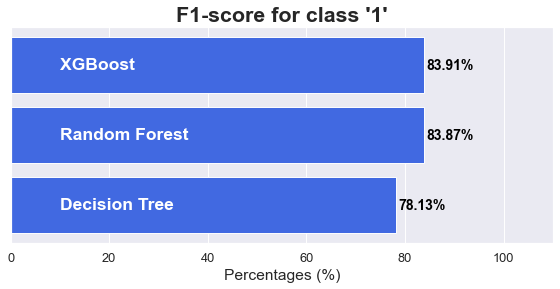

In [128]:
# Prepare values
results.sort_values(by='F1-score (Class 1)', ascending=True, inplace=True)
f1_scores = results['F1-score (Class 1)'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 4), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Model Performance Evaluation - XGBoost</h2>
    <ul>
        <li>🏆 Accuracy: 86.14%</li>
        <li>🏆 F1-score (Class 1): 83.91%</li>
        <li>🏆 Precision (Class 1): 98.3%</li>
        <li>🏆 Recall (Class 1): 73.91%</li>
        <li>🏆 AUC (Class 1): 91.8%</li>
    </ul>
    <p>Among all the tested classifiers, XGBoost demonstrated the best performance in predicting loan defaulters. With an accuracy of 86% and a high recall rate of 74%, the model effectively identifies instances of defaulters while maintaining a reasonable precision score.</p>
</div>
